# ROB 498: Robot Learning for Planning and Control
# Assignment 1: Introduction to PyTorch 

## Colab Setup

In [2]:
# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a ROB498 folder and put all the files under A1 folder, then 'ROB498/HW1'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ROB498/HW1'

### Setup Code 

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from google.colab import drive

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [9]:
import os
import sys

GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

files = os.listdir(GOOGLE_DRIVE_PATH)
expected_files = [ 'ROB498_hw1.ipynb', 'pytorch_intro.py', 'hands_on_regression.py', 'regression_training_data.npz', 'regression_validation_data.npz',  'robot_kinematics_regression.py', 'robot_kinematics_training_data.npz', 'robot_kinematics_validation_data.npz',  ]
print(f'Files found: {files}')

sys.path.append(GOOGLE_DRIVE_PATH)

# Verify that there are all the expected files in the directory
all_found = True
for expected_file in expected_files:
  if expected_file not in files:
    print(f'Required file {expected_file} not found!')
    all_found = False
if all_found:
  print('All required files are found :)')

NameError: name 'GOOGLE_DRIVE_PATH_AFTER_MYDRIVE' is not defined

In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

## Assignment Introduction

Due 2/5 at 11:59pm

**Rules**:

1. All homework must be done individually, but you are encouraged to post questions on Piazza

2. No late homework will be accepted (unless you use your late-day tokens)

3. Submit your code on [autograder.io](http://autograder.io/)

4. Remember that copying-and-pasting code from other sources is not allowed

5. The use of additional package imports beyound the packages we provide is not allowed. The autograder will not grade your code if you use additional packages.

## 1 - PyTorch Basics (24 points)

In this section you will practice some basic tensor operations in PyTorch. Some of these questions were adapted from Juston Johnson's Deep Learning for Computer Vision class (https://web.eecs.umich.edu/~justincj/teaching/eecs498/WI2022/assignment1.html.) 


**GRADING GUIDE**

Each part will be evaluated on 2 test (1 point each) making each part worth 2 points.

In [38]:
# Imports:
from pytorch_intro import *

### Tensor Basics

a) Complete the function `create_tensor_of_pi` in `pytorch_intro.py`. The function takes as arguments integers M and N and should return a tensor of shape (M, N) which is filled with the value of 3.14



In [39]:
M, N = 3, 2

pi = create_tensor_of_pi(M, N)
print('Here is the tensor')
print(pi)

print(f'Shape of tensor: {pi.shape}')

Here is the tensor
tensor([[3.1400, 3.1400],
        [3.1400, 3.1400],
        [3.1400, 3.1400]])
Shape of tensor: torch.Size([3, 2])


b) Slice indexing - fill in the function `slice_indexing_practice` in `pytorch_intro.py`. The function takes as input a tensor of shape (M, N). The function should return the following:
- The last row of x. This should be shape (N,)
- The third column of x. This should be of shape (M, 1)
- Tensor of shape (2, 3) which contains the first two rows and first three columns of x
- even_rows_odd_cols: Two dimensional tensor containing the even rows and odd columns of x.

In [40]:
x = torch.tensor([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20]
])

(last_row, third_col, first_two_rows_three_cols, even_rows_odd_cols) = slice_indexing_practice(x)

print('Last row is ')
print(last_row)
print('Third col is')
print(third_col)
print('First two rows and first three columns are')
print(first_two_rows_three_cols)
print('Even rows and odd columns')
print(even_rows_odd_cols)

Last row is 
tensor([16, 17, 18, 19, 20])
Third col is
tensor([[ 3],
        [ 8],
        [13],
        [18]])
First two rows and first three columns are
tensor([[1, 2, 3],
        [6, 7, 8]])
Even rows and odd columns
tensor([[ 2,  4],
        [12, 14]])


c) Slice assigment - fill in the function `slice_assignment_practice` in `pytorch_intro.py`. The function takes as input a two-dimensional tensor of shape (M, N). You should modify the input such that the first 4 rows and 6 columns are equal to:

    [0 1 2 2 2 2]
    [0 1 2 2 2 2]
    [3 4 3 4 5 5]
    [3 4 3 4 5 5]

The rest of the tensor should remain unchanged

In [41]:
x = torch.ones(6, 8)
print('x is ')
print(x)

print('modified x is')
print(slice_assignment_practice(x))

x is 
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])
modified x is
tensor([[0., 1., 2., 2., 2., 2., 1., 1.],
        [0., 1., 2., 2., 2., 2., 1., 1.],
        [3., 4., 3., 4., 5., 5., 1., 1.],
        [3., 4., 3., 4., 5., 5., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])


d) Shuffle columns - complete the function `shuffle_cols`. This function takes as input a tensor of shape (M, N). It should return the following tensor y:
- The first two columns of y are copies of the first column of x
- The third column of y is the same as the third column of x
- The fourth column of y is the same as the second column of x

In [42]:
x = torch.tensor([[-2, -4, -1, 1],
                  [-5, -3, 5, -3],
                  [4, 4, -5, -3],
                  [2, -5, -2, -5],
                  [-1, -3, 0, 1],
                  [-6, 4, 2, -1]])
y = shuffle_cols(x)
print('y is ')
print(y)

y is 
tensor([[-2, -2, -1, -2],
        [-5, -5,  5, -5],
        [ 4,  4, -5,  4],
        [ 2,  2, -2,  2],
        [-1, -1,  0, -1],
        [-6, -6,  2, -6]])


e) Reverse rows - fill in the function `reverse_rows.py`. This function takes as input a tensor of shape (M, N). It should return a tensor with the rows reversed. i.e. the first row should be equal to the last row of x, the second row should be equal to the second to last row of x, etc.

In [43]:
x = torch.tensor([[1, 1, 1, 1],
                  [2, 2, 2, 2],
                  [3, 3, 3, 3],
                  [4, 4, 4, 4],
                  [5, 5, 5, 5]])
print('Reversed row of x is')
print(reverse_rows(x))

Reversed row of x is
tensor([[5, 5, 5, 5],
        [4, 4, 4, 4],
        [3, 3, 3, 3],
        [2, 2, 2, 2],
        [1, 1, 1, 1]])


f) Reshaping - Complete the function `reshape_practice`. The function takes a tensor of shape (24,). It should return a tensor of shape (3, 8) such that:

    y = [[x[0], x[1], x[2],  x[3],  x[12], x[13], x[14], x[15]],
         [x[4], x[5], x[6],  x[7],  x[16], x[17], x[18], x[19]],
         [x[8], x[9], x[10], x[11], x[20], x[21], x[22], x[23]]]

   You should complete this function by using `torch.reshape`, `torch.transpose` and `torch.permute`.

In [44]:
x = torch.arange(0, 24)
print('x is ')
print(x)

print('x reshaped is')
print(reshape_practice(x))

x is 
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
x reshaped is
tensor([[ 0,  1,  2,  3, 12, 13, 14, 15],
        [ 4,  5,  6,  7, 16, 17, 18, 19],
        [ 8,  9, 10, 11, 20, 21, 22, 23]])


g) Batched matrix multiplication - you should complete the function `batched_matrix_multiply`. This function takes two matrices x and y. x is of shape (B, N, M) and y is of shape (B, M, P). B is the batched dimension. The function should return the result of the B matrix multiplications, which should be of shape (B, N, P)

In [45]:
x = torch.tensor([[[3, 0, 0],
                   [-1, -1, -4],
                   [-2, -4, 1]],

                  [[-1, 2, 1],
                   [1, -2, -3],
                   [3, 0, -1]]])
y = torch.tensor([[[0, 1],
                   [-4, 0],
                   [-3, 0]],

                  [[-2, -4],
                   [0, 1],
                   [-3, 1]]])

print('The first matrix multiplication is')
print(torch.mm(x[0], y[0]))

print('The second matrix multiplcation is')
print(torch.mm(x[1], y[1]))

print('The batched matrix multiplications are')
print(batched_matrix_multiply(x, y))


The first matrix multiplication is
tensor([[ 0,  3],
        [16, -1],
        [13, -2]])
The second matrix multiplcation is
tensor([[ -1,   7],
        [  7,  -9],
        [ -3, -13]])
The batched matrix multiplications are
tensor([[[  0,   3],
         [ 16,  -1],
         [ 13,  -2]],

        [[ -1,   7],
         [  7,  -9],
         [ -3, -13]]])


### Autograd

h) Scalar function and gradient - complete the function `compute_scalar_function_and_grad`. The function should compute the function $y = 3 x^2$ and compute the gradient using PyTorch autograd. You should use .backward() to compute the gradient, and the function should only return y. If you have successfully implemented the function, the gradient of x should be stored in x.grad after the function has been run.

In [46]:
x = torch.tensor([1.5])
print('y is')
print(compute_scalar_function_and_grad(x).item())

print('Gradient of x is')
print(x.grad.item())


y is
6.75
Gradient of x is
9.0


i) Vector function and gradient. Complete the function `compute_vector_function_and_grad`. This function should compute the vector function $y = \begin{bmatrix} cos(2 x_1 + x_2) \\ sin(2 x_2 - x_1) \end{bmatrix}$ from input $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$. You should use autograd to compute the quantity $\begin{bmatrix} \frac{\partial y_1}{\partial x_1} + \frac{\partial y_2}{\partial x_1} \\ \frac{\partial y_1}{\partial x_2} + \frac{\partial y_2}{\partial x_2} \end{bmatrix}$. If you do this successfully the result should be stored in x.grad. This is known as a Jacobian-vector product and is the product $\frac{dy}{dx} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

In [47]:
x = torch.tensor([-0.5, 0.5])
y = compute_vector_function_and_grad(x)

print('y is ')
print(y)

print('the Jacobian-vector product is')
print(x.grad)

y is 
tensor([0.8776, 0.9975], grad_fn=<StackBackward0>)
the Jacobian-vector product is
tensor([0.8881, 0.6209])


j) Scalar function and partial gradient - you should complete the function `compute_scalar_function_and_partial_grad`. This function takes as input two tensors of shape (1) x and y, and should return $z=y\sqrt(x)$. You should use pytorch autograd to compute the gradient of z with respect to x, but not with y. If this is implemented correctly the gradient with respect to x should be stored in `x.grad` and `y.grad` should be None.

In [48]:
x = torch.tensor([4.])
y = torch.tensor([0.5])

print('z is ')
print(compute_scalar_function_and_partial_grad(x, y))
print('grad x is ')
print(x.grad)
print('grad y is ')
print(y.grad)

z is 
tensor([1.], grad_fn=<MulBackward0>)
grad x is 
tensor([0.1250])
grad y is 
None


### Forward Kinematics

k) 
In this part, we will compute the manipulator Jacobian for a 2-link planar robot.

In robotics, the Jacobian relates the velocities in joint space to the end-effector velocities. 

Given the robot joints values $\mathbf\theta = \begin{bmatrix}\theta_1 &\dots & \theta_n\end{bmatrix}^\top\in \mathbb R^n$, the forward kinematics function $f_\text{FK}$ maps the joint values to the end-effector coordinates $\mathbf x\in \mathbb R^m$. Therefore, the forward kinematics can be written as:
$$
\mathbf x = f_\text{FK}(\mathbf \theta)
$$
To obtain the end-effector velocities $\dot{\mathbf x} = \frac{d\mathbf x}{dt}\in\mathbb R^m$, by the chain rule it can be computed as
$$
\dot{\mathbf x} = \frac{\partial f_\text{FK}(\mathbf \theta)}{\partial \theta}\frac{d\theta(t)}{dt} = \frac{\partial f_\text{FK}(\mathbf \theta)}{\partial \theta}\dot{\theta} = \mathbf J(\theta) \dot{\theta}
$$
where $\mathbf J(\theta)\in \mathbb R^{m\times n}$ is called the **Jacobian**.
The Jacobian matrix represents the linear sensitivity of the end-effector velocity $\dot{\mathbf x}$ to the joint velocity $\dot{\mathbf \theta}$ as a function of the joint variables $\mathbf \theta$.

> For more information: [Lynch, Kevin. Modern Robotics.](https://modernrobotics.northwestern.edu/nu-gm-book-resource/5-1-1-space-jacobian/)

In this section, we will compute the Jacobina using the torch `autograd` tools.

Given a 2-link robot with link length $L_1$ and $L_2$, and the robot joints $
\theta = \begin{bmatrix}\theta_1 & \theta_2\end{bmatrix}^\top$, the forward kinematics are given by
$$
\mathbf x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix} = f_\text{FK}(\theta) = \begin{bmatrix} L_1 \cos\theta_1 + L_2\cos(\theta_1 + \theta_2) \\ L_1\sin\theta_1 + L_2\sin(\theta_1 + \theta_2)\end{bmatrix}
$$

![2-link manipulator](https://drive.google.com/uc?export=view&id=10gWhX8Eyfx4YFkfNYpGWenIdfgtF0Re5)


TODO: 
 1. Implement `compute_forward_kinematics` in `pytorch_intro.py`.
 2. Implement `compute_jacobian` in `pytorch_intro.py`.

In [49]:
# Compute Forward Kinematics:

thetas = torch.zeros(2, requires_grad=True)
print(f'Forward kinematics -- thetas {thetas} end-effector position: {compute_forward_kinematics(thetas)}')



Forward kinematics -- thetas tensor([0., 0.], requires_grad=True) end-effector position: tensor([3., 0.], grad_fn=<StackBackward0>)


In [50]:
# Compute Jacobian:

print(f'The jacobian for the configuration thetas={thetas} is:\n{compute_jacobian(thetas)}')

The jacobian for the configuration thetas=tensor([0., 0.], requires_grad=True) is:
tensor([[0., 0.],
        [3., 1.]], grad_fn=<StackBackward0>)


## 2 - Hands on Regression (46 points)



In this second part, we will review some classical regression methods and compare them with Neural Networks. We will also cover some data handling basics.

In [1]:
from hands_on_regression import *

### Load Regression Data

We will work with some data, and the goal is to find a function that approximates them. Here, we first load the data.

In [5]:
train_data_path = "regression_training_data.npz"
val_data_path = "regression_validation_data.npz"

train_data = np.load(train_data_path)
val_data = np.load(val_data_path)

# Unpack the data
xs = torch.from_numpy(train_data['x'])[:, None] # shape (N, 1)
ys = torch.from_numpy(train_data['y'])[:, None] # shape (N, 1)

xs_val = torch.from_numpy(val_data['x'])[:, None] # shape (N, 1)
ys_val = torch.from_numpy(val_data['y'])[:, None] # shape (N, 1)

Next, here we provide some code to visualize the data.

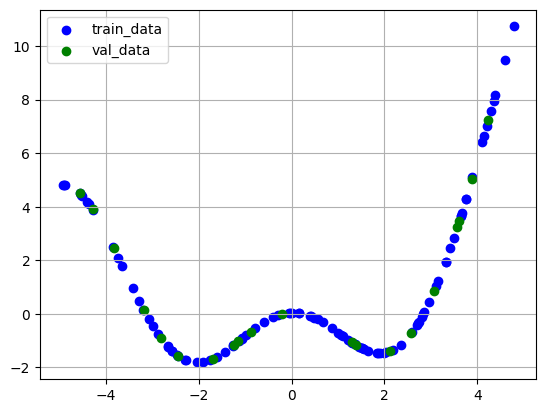

In [6]:
# Visualize data
plt.scatter(xs, ys, color='b', label='train_data')
plt.scatter(xs_val, ys_val, color='g', label='val_data')
plt.legend()
plt.grid()
plt.show()


### Polynomial Regression

We will start by approximating the data with a polynomia of degree $d$.

$ f(x)=c_0 + c_1 x + c_2 x^2 + \dots + c_{d}x^d$

Implement `polynomial_basis_functions` in `hands_on_regression.py` (2 points)

#### Linear Least Squares


In [7]:
degree = 5
Xs_polynomial = polynomial_basis_functions(xs, degree)

print(f'Polynomial expansion size: {Xs_polynomial.shape}. Expected size: torch.Size([{len(xs)}, {degree+1}])')

Polynomial expansion size: torch.Size([100, 6]). Expected size: torch.Size([100, 6])


Implement `compute_least_squares_solution` in `hands_on_regression.py` to compute the Least Squares regression solution. (6 points)

 This should compute the coefficients $[c_0,\dots, c_d]$ that best fit the data `ys` given the $d$-degree plynomial expanded data `Xs_polynomial`.

In [8]:
coeffs_poly = compute_least_squares_solution(Xs_polynomial, ys)
print(f'Computed coefficients: {coeffs_poly} \n-- It should be a torch tensor of size torch.Size([{degree+1}])). Returned size: {coeffs_poly.shape}')

Computed coefficients: tensor([-0.8774,  0.0733, -0.0791, -0.0041,  0.0221,  0.0015]) 
-- It should be a torch tensor of size torch.Size([6])). Returned size: torch.Size([6])


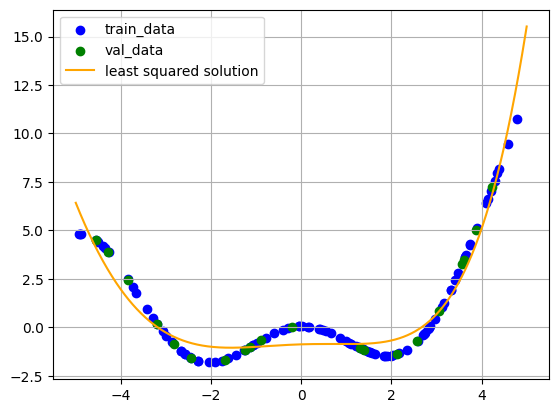

In [9]:
# visualize the polynomial fit
x_poly = torch.linspace(-5, 5, 1000)[:, None]
y_poly = torch.sum(polynomial_basis_functions(x_poly, degree) * coeffs_poly, axis=1)

plt.scatter(xs, ys, color='b', label='train_data')
plt.scatter(xs_val, ys_val, color='g', label='val_data')
plt.plot(x_poly, y_poly, color='orange', label='least squared solution')
plt.grid()
plt.legend()
plt.show()

As you can see, the fit is not great. Way need to increse the polynomial degree.
The following code will test multiple degrees. Which one is the best?

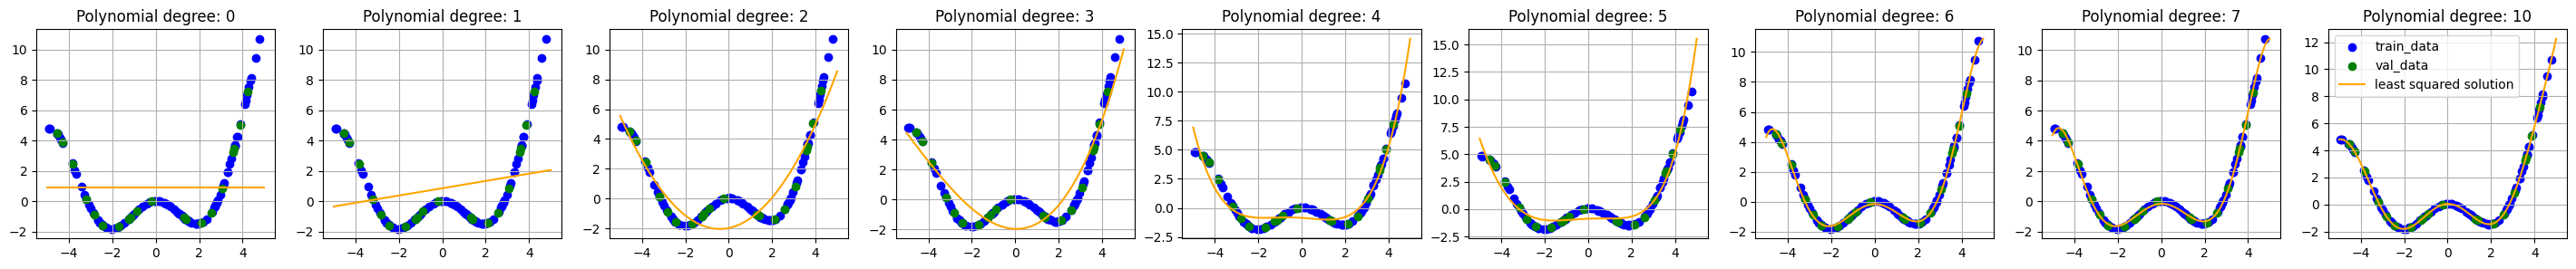

In [10]:
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 10]  # TODO: Modify this value

fig, axes = plt.subplots(nrows=1, ncols=len(degrees), figsize=(4 * len(degrees), 3))

for i, degree in enumerate(degrees):
    Xs_polynomial = polynomial_basis_functions(xs, degree)

    coeffs_poly = compute_least_squares_solution(Xs_polynomial, ys)

    x_poly = torch.linspace(-5, 5, 1000)[:, None]
    y_poly = torch.sum(polynomial_basis_functions(x_poly, degree) * coeffs_poly, axis=1)

    ax_i = axes[i]
    ax_i.scatter(xs, ys, color='b', label='train_data')
    ax_i.scatter(xs_val, ys_val, color='g', label='val_data')
    ax_i.plot(x_poly, y_poly, color='orange', label='least squared solution')
    ax_i.set_title(f'Polynomial degree: {degree}')
    ax_i.grid()
axes[-1].legend()
plt.show()

#### Linear Least Squares using Gradient Descent






Now, we will do the same, but with a Neural Network. 
In this section, we will regress the coefficients $[c_0, \dots, c_d]$ using a single Linear layer a without bias.
You will have to implement the network, as well as the train and validation pipeline.
Here onwards, we will choose $d=6$.

But first, you will have to implement some basic functions to normalize the data.

TODO:

* Implement `get_normalization_constants` which given a tensors, it returns its normalization constants. The normalization constants are the mean and the std. (2 points)
* Implement `normalize_tensor` that returns the normalized tensor for the given normalization constants. (2 points)
* Implement `denormalize_tensor` that inverts the normalization of tensor for the given normalization constants. (2 points)


In [11]:
# Prepare the data:

class SimpleDataset(Dataset):
    def __init__(self, Xs, ys):
        self.Xs = Xs
        self.ys = ys

    def __len__(self):
        return len(self.Xs)

    def __getitem__(self, idx):
        x_i = self.Xs[idx]
        y_i = self.ys[idx]
        return x_i, y_i



# #xpand data using the polynomial basis fuctions
degree = 6 # Minimum degree that explains the data.
Xs_polynomial = polynomial_basis_functions(xs, degree)
Xs_polynomial_val = polynomial_basis_functions(xs_val, degree)


# Normalize the data
X_mean, X_std = get_normalization_constants(Xs_polynomial)
y_mean, y_std = get_normalization_constants(ys)
Xs_polynomial_norm = normalize_tensor(Xs_polynomial, X_mean, X_std)
ys_polynomial_norm = normalize_tensor(ys, y_mean, y_std) 
Xs_polynomial_val_norm = normalize_tensor(Xs_polynomial_val, X_mean, X_std )
ys_polynomial_val_norm = normalize_tensor(ys_val, y_mean, y_std)

# Force Xs to have the first column as 1s to have the bias effect and avoid normalization
Xs_polynomial_norm[:,0] = 1 # Force biases to 1
Xs_polynomial_val_norm[:, 0] = 1 # Force biases to 1

# Create Datasets
train_dataset = SimpleDataset(Xs_polynomial_norm, ys_polynomial_norm)
val_dataset = SimpleDataset(Xs_polynomial_val_norm, ys_polynomial_val_norm)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))


We will save the normalization constants for evaluation. You will have to submit `regression_norm_constants.pt` along with your implementation.

In [12]:
# save normalization constants:
norm_constants = {
   'X_mean': X_mean,
   'X_std': X_std,
   'y_mean': y_mean,
   'y_std': y_std, 
}
save_path = "regression_norm_constants.pt"
torch.save(norm_constants, save_path)

Next, we will train our model. 
Implement the `LinearRegressor` class in `hands_on_regression.py`. 
This NN should be a single Linear layer without biases.
Remember to initialize the NN weights in the `__init__`. 

You will also have to implement the training functionalities. Explicitly, you need to implement:
* `train_step`: Perfoms an epoch of training the model.
* `val_step`: Perfoms an epoch of model performance validation. 
* `train_model`: Trains the given model for `num_epochs` epochs. You may need to use `train_step` and `val_step`.

For loss, use MSE loss. You can use `F.mse_loss`.
For parameter optimization, use Stochastic Gradient Descent (SGD).


The training should take about 2 min.

Check the loss curves and modify the `NUM_EPOCHS` and `LR` hyperparameters.

In [13]:

linear_regressor = LinearRegressor(Xs_polynomial.shape[-1])
# print(linear_regressor.num_in_feats)
print(f"Model Weights Shape: {linear_regressor.linear.weight.shape}")

Model Weights Shape: torch.Size([1, 7])


Train Loss: 0.0026 | Validation Loss: 0.0022: 100%|██████████| 10000/10000 [00:14<00:00, 692.42it/s]


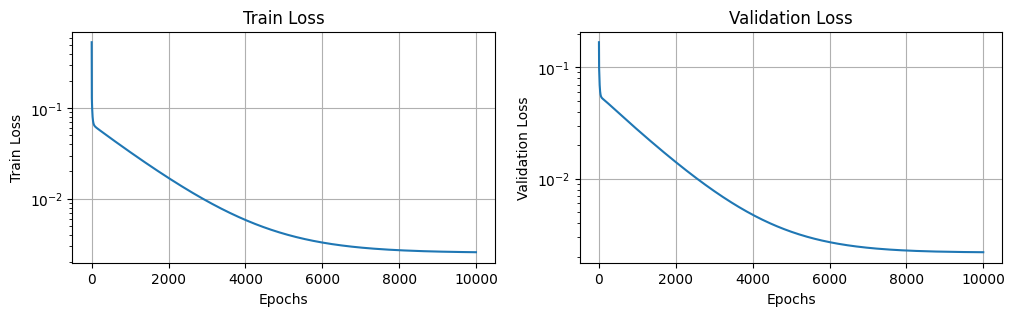

In [14]:
LR = 0.11
NUM_EPOCHS = 10000

linear_regressor = LinearRegressor(Xs_polynomial.shape[-1])

train_losses, val_losses = train_model(linear_regressor, train_loader, val_loader, num_epochs=NUM_EPOCHS, lr=LR)


# plot train loss and test loss:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes[0].plot(train_losses)
axes[0].grid()
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Train Loss')
axes[0].set_yscale('log')
axes[1].plot(val_losses)
axes[1].grid()
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss')
axes[1].set_yscale('log')

We will save the trained model. You will have to submit it along your code.

In [15]:
# save model:
save_path = "linear_regressor.pt"
torch.save(linear_regressor.state_dict(), save_path)

Let's visualize the performance:

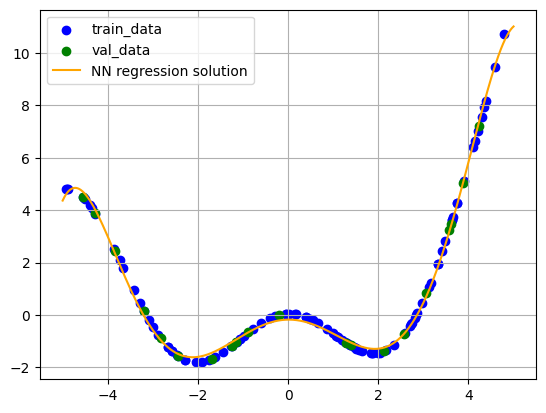

In [16]:
# create evaluation data:
x_nn = torch.linspace(-5, 5, 1000, dtype=torch.float32)[:,None]
X_nn = polynomial_basis_functions(x_nn, degree)
# Normalize data
X_nn_norm = normalize_tensor(X_nn, X_mean, X_std )
X_nn_norm[:,0] = 1 # Force biases to 1

y_nn_norm = linear_regressor(X_nn_norm)
y_nn = denormalize_tensor(y_nn_norm, y_mean, y_std).detach().cpu()
plt.scatter(xs, ys, color='b', label='train_data')
plt.scatter(xs_val, ys_val, color='g', label='val_data')
plt.plot(x_nn, y_nn, color='orange', label='NN regression solution')
plt.grid()
plt.legend()
plt.show()

**GRADING GUIDE**

Your `linear_regressor` implementation will be graded by evaluating its predictive accuracy on the validation data provided (6 points) as well as a hidden test data set (6 points).
Your model will have to have a predicive score of less than 0.05.

We will also evaluate the model to have the desired architecture (4 points)

In [17]:
y_pred_norm = linear_regressor(Xs_polynomial_norm)
y_pred = denormalize_tensor(y_pred_norm, y_mean, y_std)
train_score = F.mse_loss(y_pred, ys).item()
y_pred_norm_val = linear_regressor(Xs_polynomial_val_norm)
y_pred_val = denormalize_tensor(y_pred_norm_val, y_mean, y_std)
val_score = F.mse_loss(y_pred_val, ys_val).item()
print(f'Train set score: {train_score}')
print(f'Validation set score: {val_score}')

Train set score: 0.021553611382842064
Validation set score: 0.01837949827313423


Observe that although the neural network can do a good job approximating the data, its performance is only good within the training distribution. 

Observe predicted values outside the training distribution:

torch.Size([1000, 1])


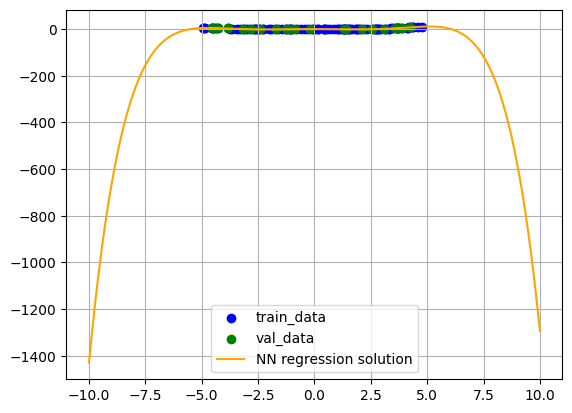

In [18]:
# Visualize out-of-distribution performance:
x_nn = torch.linspace(-10, 10, 1000, dtype=torch.float32)[:, None]
X_nn = polynomial_basis_functions(x_nn, degree)
# Normalize data
X_nn_norm = normalize_tensor(X_nn, X_mean, X_std )
X_nn_norm[:,0] = 1 # Force biases to 1

y_nn_norm = linear_regressor(X_nn_norm)
y_nn = denormalize_tensor(y_nn_norm, y_mean, y_std).cpu().detach()
print(y_nn.shape)
plt.scatter(xs, ys, color='b', label='train_data')
plt.scatter(xs_val, ys_val, color='g', label='val_data')
plt.plot(x_nn, y_nn, color='orange', label='NN regression solution')
plt.grid()
plt.legend()
plt.show()

### Neural Network as a General Function Approximation

In this section we will show that NN are capable of approximating general functions without the need of a set of basis functions.

TODO: 

* Implement the `GeneralNN`, which should be a 3 fully-connected layers with hidden sizes 100 and Tanh activations. The network input features are one-dimensional as well as the output features.

Note that in this case we are not normalizing the data. For this case observe that the performance of deep neural netowrks is good even without normalizing the data.

Train Loss: 0.0008 | Validation Loss: 0.0009: 100%|██████████| 20000/20000 [00:39<00:00, 510.37it/s]


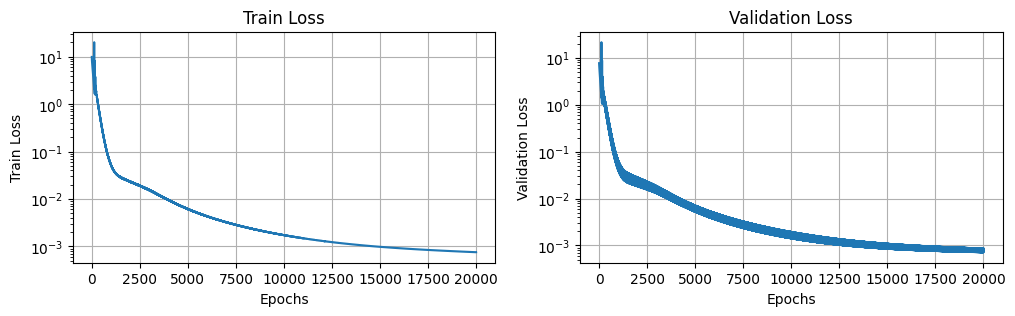

In [19]:
# Hyperparameters:
LR = 1e-2
NUM_EPOCHS = 20000

# Initialize the model
general_nn = GeneralNN()

# Create dataset without polynomial basis functions:
train_dataset = SimpleDataset(xs, ys)
val_dataset = SimpleDataset(xs_val, ys_val)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))

# Train the model
train_losses, val_losses = train_model(general_nn, train_loader, val_loader, num_epochs=NUM_EPOCHS, lr=LR)

# plot train loss and test loss:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes[0].plot(train_losses)
axes[0].grid()
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Train Loss')
axes[0].set_yscale('log')
axes[1].plot(val_losses)
axes[1].grid()
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss')
axes[1].set_yscale('log')

In [20]:
# save model:
save_path = "general_nn.pt"
torch.save(general_nn.state_dict(), save_path)

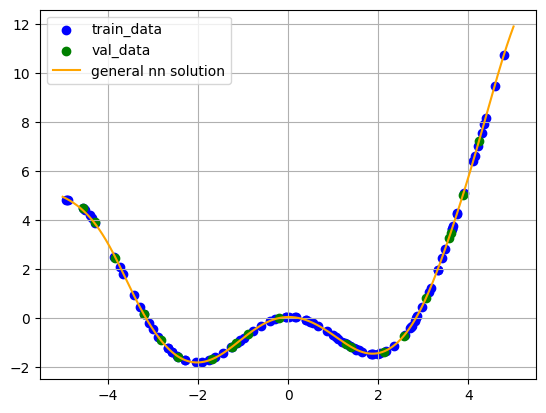

In [21]:
# Create evaluation data
x_nn = torch.linspace(-5, 5, 1000, dtype=torch.float32)[:, None]
X_nn = x_nn

# Call the method
y_nn = general_nn(X_nn).cpu().detach()

# Plot the data to evaluate the fit.
plt.scatter(xs, ys, color='b', label='train_data')
plt.scatter(xs_val, ys_val, color='g', label='val_data')
plt.plot(x_nn, y_nn, color='orange', label='general nn solution')
plt.grid()
plt.legend()
plt.show()

**GRADING GUIDE**

Your `general_nn` implementation will be graded by evaluating its predictive accuracy on the validation data provided (6 points) as well as a hidden test data set (6 points).
Your model will have to have a predicive score of less than 0.01.

We will also evaluate the model to have the desired architecture (4 points)

In [22]:
y_pred = general_nn(xs)
train_score = F.mse_loss(y_pred, ys).item()
y_pred_val = general_nn(xs_val)
val_score = F.mse_loss(y_pred_val, ys_val).item()
print(f'Train set score: {train_score}')
print(f'Validation set score: {val_score}')

Train set score: 0.0007513287127949297
Validation set score: 0.0008622190798632801


## 3 - Robot Kinematics Regression (30 points)

We have already seen an example of a robot kinematics problem for a 2-link robot manipulator, here we will consider a 3-link robot manipulator. 

Recall that the forward kinematics function is $$\mathbf x = f_\text{FK}(\mathbf \theta)$$

Unfortunately there is noise and a systematic error between the actual end-effector position $\mathbf{x}$ and the end-effector position predicted from the analytic kinematics solution. This error is a nonlinear function of the commanded joint configuration $\theta_{\text{des}}$. See the image below.

This error could come from a number of sources - for example the robot's motors could be unable to supply adequate torque for counteracting gravity in some configurations, or there could be state-dependent error in the robot joint encoders. 



![underpowered_3_link_manipulator](https://drive.google.com/uc?export=view&id=19TwxG36_cUcnKTQZBOwn2KNWO8zdidQd)

In this question, you are given a dataset of the commanded joint configuration $\theta_{des}$ and the corresponding end-effector positions $\mathbf x$. Your task is to learn a Neural Network to approximate the function

 $$  \mathbf x = f_\text{FK}(\mathbf \theta_{des})$$

 For this problem you need to:

 * Complete the `MLP` class in `robot_kinematics_regression.py`
      * The Neural Network should contain 1 hidden layer
      * The hidden layer size should be 128
      * You should use ReLU activations
 * Train your model on the dataset below.
      * You should normalize the features and targets of this dataset
 * Save the trained model as `robot_kinematics_model.pt`

For this question you will only be assessed on
1. Completing the `MLP` class correctly
2. The final performance of your learned model 

You are encouraged to reuse code from the previous question. 


In [2]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

class SimpleDataset(Dataset):
    def __init__(self, Xs, ys):
        self.Xs = Xs
        self.ys = ys

    def __len__(self):
        return len(self.Xs)

    def __getitem__(self, idx):
        x_i = self.Xs[idx]
        y_i = self.ys[idx]
        return x_i, y_i

Train Loss: 0.3571 | Validation Loss: 0.3509:   5%|▌         | 50/1000 [00:03<01:09, 13.61it/s]


0.2 0.3570830225944519 0.35094207525253296


Train Loss: 0.3492 | Validation Loss: 0.3293:   5%|▌         | 50/1000 [00:03<01:09, 13.62it/s]


0.2025 0.34921905398368835 0.3293343186378479


Train Loss: 0.2722 | Validation Loss: 0.2659:   5%|▌         | 50/1000 [00:03<01:10, 13.50it/s]


0.20500000000000002 0.27219611406326294 0.26592516899108887


Train Loss: 0.1905 | Validation Loss: 0.2061:   5%|▌         | 50/1000 [00:03<01:10, 13.53it/s]


0.20750000000000002 0.1905297487974167 0.2061006724834442


Train Loss: 0.1527 | Validation Loss: 0.1620:   5%|▌         | 50/1000 [00:03<01:09, 13.66it/s]


0.21000000000000002 0.15269632637500763 0.16199304163455963


Train Loss: 0.1239 | Validation Loss: 0.1336:   5%|▌         | 50/1000 [00:03<01:13, 12.89it/s]


0.21250000000000002 0.12389635294675827 0.13360495865345


Train Loss: 0.0966 | Validation Loss: 0.0956:   5%|▌         | 50/1000 [00:03<01:13, 12.97it/s]


0.21500000000000002 0.09655257314443588 0.09557104855775833


Train Loss: 0.0986 | Validation Loss: 0.0950:   5%|▌         | 50/1000 [00:03<01:13, 12.98it/s]


0.21750000000000003 0.09857668727636337 0.09504222124814987


Train Loss: 0.0909 | Validation Loss: 0.0882:   5%|▌         | 50/1000 [00:03<01:14, 12.82it/s]


0.22000000000000003 0.0909338891506195 0.08821428567171097


Train Loss: 0.0801 | Validation Loss: 0.0785:   5%|▌         | 50/1000 [00:03<01:12, 13.15it/s]


0.22250000000000003 0.08010147511959076 0.0785408541560173


Train Loss: 0.0728 | Validation Loss: 0.0717:   5%|▌         | 50/1000 [00:03<01:13, 12.92it/s]


0.22500000000000003 0.07276973873376846 0.07169439643621445


Train Loss: 0.0645 | Validation Loss: 0.0629:   5%|▌         | 50/1000 [00:03<01:14, 12.77it/s]


0.22750000000000004 0.0645197331905365 0.06287899613380432


Train Loss: 0.0577 | Validation Loss: 0.0565:   5%|▌         | 50/1000 [00:03<01:15, 12.61it/s]


0.23000000000000004 0.05769390985369682 0.05645369365811348


Train Loss: 0.0538 | Validation Loss: 0.0550:   5%|▌         | 50/1000 [00:03<01:14, 12.75it/s]


0.23250000000000004 0.05380001291632652 0.05504976585507393


Train Loss: 0.0448 | Validation Loss: 0.0477:   5%|▌         | 50/1000 [00:03<01:14, 12.70it/s]


0.23500000000000004 0.044752202928066254 0.047678250819444656


Train Loss: 0.0448 | Validation Loss: 0.0466:   5%|▌         | 50/1000 [00:03<01:13, 12.91it/s]


0.23750000000000004 0.044768329709768295 0.04663795977830887


Train Loss: 0.0461 | Validation Loss: 0.0498:   5%|▌         | 50/1000 [00:03<01:14, 12.73it/s]


0.24000000000000005 0.04608708620071411 0.04983143508434296


Train Loss: 0.0449 | Validation Loss: 0.0468:   5%|▌         | 50/1000 [00:03<01:13, 12.85it/s]


0.24250000000000005 0.04494080692529678 0.04683259502053261


Train Loss: 0.0376 | Validation Loss: 0.0374:   5%|▌         | 50/1000 [00:03<01:12, 13.09it/s]


0.24500000000000005 0.03760308027267456 0.03740713745355606


Train Loss: 0.0438 | Validation Loss: 0.0424:   5%|▌         | 50/1000 [00:03<01:14, 12.74it/s]


0.24750000000000005 0.04379259794950485 0.04243810102343559


Train Loss: 0.0399 | Validation Loss: 0.0396:   5%|▌         | 50/1000 [00:03<01:12, 13.13it/s]


0.25000000000000006 0.03991308435797691 0.03959500789642334


Train Loss: 0.0366 | Validation Loss: 0.0390:   5%|▌         | 50/1000 [00:03<01:12, 13.08it/s]


0.25250000000000006 0.036622606217861176 0.038999851793050766


Train Loss: 0.0401 | Validation Loss: 0.0430:   5%|▌         | 50/1000 [00:03<01:13, 12.90it/s]


0.25500000000000006 0.04008350893855095 0.04302643612027168


Train Loss: 0.0373 | Validation Loss: 0.0383:   5%|▌         | 50/1000 [00:03<01:13, 12.85it/s]


0.25750000000000006 0.03728288412094116 0.03833857923746109


Train Loss: 0.0331 | Validation Loss: 0.0323:   5%|▌         | 50/1000 [00:03<01:14, 12.67it/s]


0.26000000000000006 0.03314877301454544 0.032315876334905624


Train Loss: 0.0352 | Validation Loss: 0.0348:   5%|▌         | 50/1000 [00:03<01:14, 12.82it/s]


0.26250000000000007 0.03517339006066322 0.034801580011844635


Train Loss: 0.0373 | Validation Loss: 0.0391:   5%|▌         | 50/1000 [00:03<01:14, 12.76it/s]


0.26500000000000007 0.03726990148425102 0.0391065888106823


Train Loss: 0.0362 | Validation Loss: 0.0388:   5%|▌         | 50/1000 [00:03<01:13, 12.93it/s]


0.26750000000000007 0.036199744790792465 0.03878774121403694


Train Loss: 0.0341 | Validation Loss: 0.0350:   5%|▌         | 50/1000 [00:04<01:16, 12.35it/s]


0.2700000000000001 0.03414286673069 0.03500163182616234


Train Loss: 0.0318 | Validation Loss: 0.0309:   5%|▌         | 50/1000 [00:03<01:14, 12.80it/s]


0.2725000000000001 0.03179856389760971 0.03085133247077465


Train Loss: 0.0323 | Validation Loss: 0.0322:   5%|▌         | 50/1000 [00:03<01:13, 12.91it/s]


0.2750000000000001 0.03228910639882088 0.03217431530356407


Train Loss: 0.0316 | Validation Loss: 0.0337:   5%|▌         | 50/1000 [00:03<01:13, 13.01it/s]


0.2775000000000001 0.031588245183229446 0.03374199941754341


Train Loss: 0.0315 | Validation Loss: 0.0341:   5%|▌         | 50/1000 [00:03<01:14, 12.75it/s]


0.2800000000000001 0.031547803431749344 0.03413926064968109


Train Loss: 0.0328 | Validation Loss: 0.0330:   5%|▌         | 50/1000 [00:03<01:13, 12.97it/s]


0.2825000000000001 0.032769255340099335 0.032969675958156586


Train Loss: 0.0335 | Validation Loss: 0.0324:   5%|▌         | 50/1000 [00:03<01:12, 13.11it/s]


0.2850000000000001 0.033472608774900436 0.032421600073575974


Train Loss: 0.0331 | Validation Loss: 0.0342:   5%|▌         | 50/1000 [00:03<01:15, 12.54it/s]


0.2875000000000001 0.03310807794332504 0.034195009618997574


Train Loss: 0.0324 | Validation Loss: 0.0352:   5%|▌         | 50/1000 [00:03<01:14, 12.74it/s]


0.2900000000000001 0.03235947713255882 0.03519831597805023


Train Loss: 0.0309 | Validation Loss: 0.0317:   5%|▌         | 50/1000 [00:03<01:12, 13.02it/s]


0.2925000000000001 0.030940445140004158 0.031745001673698425


Train Loss: 0.0313 | Validation Loss: 0.0303:   5%|▌         | 50/1000 [00:03<01:14, 12.75it/s]


0.2950000000000001 0.0313180536031723 0.030268007889389992


Train Loss: 0.0305 | Validation Loss: 0.0308:   5%|▌         | 50/1000 [00:03<01:12, 13.02it/s]


0.2975000000000001 0.030527228489518166 0.030806636437773705


Train Loss: 0.0299 | Validation Loss: 0.0321:   5%|▌         | 50/1000 [00:03<01:14, 12.81it/s]


0.3000000000000001 0.029928995296359062 0.03214384615421295


Train Loss: 0.0290 | Validation Loss: 0.0307:   5%|▌         | 50/1000 [00:03<01:12, 13.06it/s]


0.3025000000000001 0.02901066280901432 0.03069481812417507


Train Loss: 0.0291 | Validation Loss: 0.0287:   5%|▌         | 50/1000 [00:03<01:13, 12.93it/s]


0.3050000000000001 0.029126280918717384 0.028711561113595963


Train Loss: 0.0296 | Validation Loss: 0.0293:   5%|▌         | 50/1000 [00:03<01:13, 12.91it/s]


0.3075000000000001 0.029578030109405518 0.029320010915398598


Train Loss: 0.0295 | Validation Loss: 0.0314:   5%|▌         | 50/1000 [00:03<01:14, 12.72it/s]


0.3100000000000001 0.029500402510166168 0.031448330730199814


Train Loss: 0.0285 | Validation Loss: 0.0308:   5%|▌         | 50/1000 [00:03<01:14, 12.81it/s]


0.3125000000000001 0.028451599180698395 0.030788125470280647


Train Loss: 0.0292 | Validation Loss: 0.0290:   5%|▌         | 50/1000 [00:03<01:13, 12.92it/s]


0.3150000000000001 0.029212411493062973 0.02903834916651249


Train Loss: 0.0296 | Validation Loss: 0.0290:   5%|▌         | 50/1000 [00:03<01:14, 12.75it/s]


0.3175000000000001 0.02964339591562748 0.029015541076660156


Train Loss: 0.0295 | Validation Loss: 0.0313:   5%|▌         | 50/1000 [00:03<01:15, 12.62it/s]


0.3200000000000001 0.029476376250386238 0.03134836256504059


Train Loss: 0.0283 | Validation Loss: 0.0309:   5%|▌         | 50/1000 [00:03<01:14, 12.80it/s]


0.3225000000000001 0.028295541182160378 0.03093608096241951


Train Loss: 0.0291 | Validation Loss: 0.0290:   5%|▌         | 50/1000 [00:03<01:13, 12.88it/s]


0.3250000000000001 0.0290552768856287 0.02895868942141533


Train Loss: 0.0294 | Validation Loss: 0.0287:   5%|▌         | 50/1000 [00:03<01:14, 12.82it/s]


0.3275000000000001 0.02942662313580513 0.02866300381720066


Train Loss: 0.0289 | Validation Loss: 0.0308:   5%|▌         | 50/1000 [00:03<01:12, 13.05it/s]


0.3300000000000001 0.028886636719107628 0.0307912714779377


Train Loss: 0.0281 | Validation Loss: 0.0308:   5%|▌         | 50/1000 [00:03<01:13, 12.89it/s]


0.33250000000000013 0.0281082633882761 0.030826386064291


Train Loss: 0.0284 | Validation Loss: 0.0283:   5%|▌         | 50/1000 [00:03<01:13, 13.00it/s]


0.33500000000000013 0.028385119512677193 0.028280925005674362


Train Loss: 0.0294 | Validation Loss: 0.0286:   5%|▌         | 50/1000 [00:03<01:13, 12.91it/s]


0.33750000000000013 0.02936423569917679 0.028611110523343086


Train Loss: 0.0283 | Validation Loss: 0.0303:   5%|▌         | 50/1000 [00:03<01:14, 12.70it/s]


0.34000000000000014 0.028317632153630257 0.03031286597251892


Train Loss: 0.0281 | Validation Loss: 0.0308:   5%|▌         | 50/1000 [00:03<01:14, 12.78it/s]


0.34250000000000014 0.028075559064745903 0.03079792857170105


Train Loss: 0.0279 | Validation Loss: 0.0278:   5%|▌         | 50/1000 [00:03<01:13, 12.98it/s]


0.34500000000000014 0.027945835143327713 0.027802689000964165


Train Loss: 0.0294 | Validation Loss: 0.0286:   5%|▌         | 50/1000 [00:03<01:11, 13.24it/s]


0.34750000000000014 0.02937663346529007 0.02864820696413517


Train Loss: 0.0279 | Validation Loss: 0.0300:   5%|▌         | 50/1000 [00:03<01:12, 13.10it/s]


0.35000000000000014 0.027881676331162453 0.029989417642354965


Train Loss: 0.0281 | Validation Loss: 0.0307:   5%|▌         | 50/1000 [00:03<01:09, 13.71it/s]


0.35250000000000015 0.02810758911073208 0.030690383166074753


Train Loss: 0.0280 | Validation Loss: 0.0277:   5%|▌         | 50/1000 [00:03<01:06, 14.21it/s]


0.35500000000000015 0.027991345152258873 0.02774990350008011


Train Loss: 0.0297 | Validation Loss: 0.0291:   5%|▌         | 50/1000 [00:03<01:09, 13.62it/s]


0.35750000000000015 0.029653405770659447 0.029118115082383156


Train Loss: 0.0283 | Validation Loss: 0.0306:   5%|▌         | 50/1000 [00:03<01:11, 13.21it/s]


0.36000000000000015 0.0282563716173172 0.030595650896430016


Train Loss: 0.0286 | Validation Loss: 0.0310:   5%|▌         | 50/1000 [00:03<01:10, 13.46it/s]


0.36250000000000016 0.02860316075384617 0.03101801499724388


Train Loss: 0.0285 | Validation Loss: 0.0282:   5%|▌         | 50/1000 [00:03<01:13, 12.86it/s]


0.36500000000000016 0.028538711369037628 0.02822333574295044


Train Loss: 0.0303 | Validation Loss: 0.0301:   5%|▌         | 50/1000 [00:03<01:15, 12.59it/s]


0.36750000000000016 0.030260149389505386 0.030089395120739937


Train Loss: 0.0286 | Validation Loss: 0.0311:   5%|▌         | 50/1000 [00:03<01:14, 12.84it/s]


0.37000000000000016 0.028577633202075958 0.031103912740945816


Train Loss: 0.0293 | Validation Loss: 0.0314:   5%|▌         | 50/1000 [00:03<01:10, 13.38it/s]


0.37250000000000016 0.02925323136150837 0.03138218820095062


Train Loss: 0.0292 | Validation Loss: 0.0288:   5%|▌         | 50/1000 [00:03<01:10, 13.43it/s]


0.37500000000000017 0.029205935075879097 0.028830615803599358


Train Loss: 0.0302 | Validation Loss: 0.0307:   5%|▌         | 50/1000 [00:03<01:12, 13.09it/s]


0.37750000000000017 0.030248409137129784 0.03073146753013134


Train Loss: 0.0289 | Validation Loss: 0.0318:   5%|▌         | 50/1000 [00:03<01:13, 12.97it/s]


0.38000000000000017 0.028920935466885567 0.03179169446229935


Train Loss: 0.0294 | Validation Loss: 0.0311:   5%|▌         | 50/1000 [00:03<01:12, 13.11it/s]


0.3825000000000002 0.029448149725794792 0.03111039102077484


Train Loss: 0.0297 | Validation Loss: 0.0293:   5%|▌         | 50/1000 [00:03<01:13, 12.87it/s]


0.3850000000000002 0.029709020629525185 0.029272975400090218


Train Loss: 0.0300 | Validation Loss: 0.0312:   5%|▌         | 50/1000 [00:03<01:13, 12.99it/s]


0.3875000000000002 0.030044015496969223 0.031160540878772736


Train Loss: 0.0289 | Validation Loss: 0.0320:   5%|▌         | 50/1000 [00:03<01:12, 13.03it/s]


0.3900000000000002 0.02886941283941269 0.03202277794480324


Train Loss: 0.0290 | Validation Loss: 0.0301:   5%|▌         | 50/1000 [00:03<01:13, 12.87it/s]


0.3925000000000002 0.028958629816770554 0.030109602957963943


Train Loss: 0.0295 | Validation Loss: 0.0291:   5%|▌         | 50/1000 [00:03<01:12, 13.04it/s]


0.3950000000000002 0.0295243002474308 0.02906147390604019


Train Loss: 0.0290 | Validation Loss: 0.0307:   5%|▌         | 50/1000 [00:03<01:13, 12.98it/s]


0.3975000000000002 0.02904857136309147 0.030724000185728073


Train Loss: 0.0284 | Validation Loss: 0.0317:   5%|▌         | 50/1000 [00:03<01:13, 12.92it/s]


0.4000000000000002 0.02841557003557682 0.03171009570360184


Train Loss: 0.0282 | Validation Loss: 0.0288:   5%|▌         | 50/1000 [00:03<01:14, 12.83it/s]


0.4025000000000002 0.0282049011439085 0.028836363926529884


Train Loss: 0.0292 | Validation Loss: 0.0287:   5%|▌         | 50/1000 [00:03<01:11, 13.24it/s]


0.4050000000000002 0.029174556955695152 0.028653765097260475


Train Loss: 0.0279 | Validation Loss: 0.0299:   5%|▌         | 50/1000 [00:03<01:13, 12.97it/s]


0.4075000000000002 0.027882182970643044 0.029916176572442055


Train Loss: 0.0279 | Validation Loss: 0.0311:   5%|▌         | 50/1000 [00:03<01:13, 13.01it/s]


0.4100000000000002 0.027868730947375298 0.03112422116100788


Train Loss: 0.0277 | Validation Loss: 0.0281:   5%|▌         | 50/1000 [00:03<01:13, 12.93it/s]


0.4125000000000002 0.027718616649508476 0.028050296008586884


Train Loss: 0.0290 | Validation Loss: 0.0284:   5%|▌         | 50/1000 [00:03<01:12, 13.06it/s]


0.4150000000000002 0.02899598330259323 0.028447862714529037


Train Loss: 0.0278 | Validation Loss: 0.0300:   5%|▌         | 50/1000 [00:03<01:15, 12.55it/s]


0.4175000000000002 0.027791913598775864 0.030036596581339836


Train Loss: 0.0280 | Validation Loss: 0.0311:   5%|▌         | 50/1000 [00:03<01:08, 13.95it/s]


0.4200000000000002 0.027962611988186836 0.031119976192712784


Train Loss: 0.0277 | Validation Loss: 0.0279:   5%|▌         | 50/1000 [00:03<01:07, 13.99it/s]


0.4225000000000002 0.027744220569729805 0.02790028788149357


Train Loss: 0.0296 | Validation Loss: 0.0289:   5%|▌         | 50/1000 [00:03<01:07, 14.05it/s]


0.4250000000000002 0.029550911858677864 0.02889809012413025


Train Loss: 0.0277 | Validation Loss: 0.0301:   5%|▌         | 50/1000 [00:03<01:10, 13.44it/s]


0.4275000000000002 0.027713250368833542 0.030130889266729355


Train Loss: 0.0285 | Validation Loss: 0.0315:   5%|▌         | 50/1000 [00:03<01:14, 12.73it/s]


0.4300000000000002 0.028457436710596085 0.03151708468794823


Train Loss: 0.0283 | Validation Loss: 0.0283:   5%|▌         | 50/1000 [00:03<01:14, 12.83it/s]


0.4325000000000002 0.02834983542561531 0.028322985395789146


Train Loss: 0.0302 | Validation Loss: 0.0296:   5%|▌         | 50/1000 [00:03<01:13, 12.89it/s]


0.4350000000000002 0.03022386133670807 0.02963104099035263


Train Loss: 0.0285 | Validation Loss: 0.0311:   5%|▌         | 50/1000 [00:03<01:14, 12.80it/s]


0.4375000000000002 0.02854963392019272 0.031145012006163597


Train Loss: 0.0291 | Validation Loss: 0.0320:   5%|▌         | 50/1000 [00:03<01:12, 13.08it/s]


0.4400000000000002 0.0291000884026289 0.032020870596170425


Train Loss: 0.0290 | Validation Loss: 0.0289:   5%|▌         | 50/1000 [00:03<01:11, 13.34it/s]


0.4425000000000002 0.02897314727306366 0.028860321268439293


Train Loss: 0.0308 | Validation Loss: 0.0304:   5%|▌         | 50/1000 [00:03<01:10, 13.54it/s]


0.44500000000000023 0.03084660694003105 0.030374087393283844


Train Loss: 0.0290 | Validation Loss: 0.0317:   5%|▌         | 50/1000 [00:03<01:11, 13.33it/s]


0.44750000000000023 0.029017135500907898 0.03174683451652527


Train Loss: 0.0298 | Validation Loss: 0.0325:   5%|▌         | 50/1000 [00:03<01:11, 13.24it/s]


0.45000000000000023 0.029765771701931953 0.03246932476758957


Train Loss: 0.0296 | Validation Loss: 0.0294:   5%|▌         | 50/1000 [00:03<01:12, 13.16it/s]


0.45250000000000024 0.0296134315431118 0.029405584558844566


Train Loss: 0.0314 | Validation Loss: 0.0312:   5%|▌         | 50/1000 [00:03<01:11, 13.27it/s]


0.45500000000000024 0.031428709626197815 0.031186841428279877


Train Loss: 0.0298 | Validation Loss: 0.0326:   5%|▌         | 50/1000 [00:03<01:13, 12.89it/s]


0.45750000000000024 0.029764145612716675 0.032616086304187775


Train Loss: 0.0304 | Validation Loss: 0.0329:   5%|▌         | 50/1000 [00:03<01:14, 12.81it/s]


0.46000000000000024 0.030385950580239296 0.03287842869758606


Train Loss: 0.0304 | Validation Loss: 0.0301:   5%|▌         | 50/1000 [00:03<01:14, 12.73it/s]


0.46250000000000024 0.030426498502492905 0.030124904587864876


Train Loss: 0.0319 | Validation Loss: 0.0320:   5%|▌         | 50/1000 [00:03<01:15, 12.65it/s]


0.46500000000000025 0.031924813985824585 0.03198980167508125


Train Loss: 0.0303 | Validation Loss: 0.0333:   5%|▌         | 50/1000 [00:03<01:13, 12.88it/s]


0.46750000000000025 0.030298633500933647 0.03327752649784088


Train Loss: 0.0309 | Validation Loss: 0.0332:   5%|▌         | 50/1000 [00:03<01:13, 12.89it/s]


0.47000000000000025 0.03085213340818882 0.0331718884408474


Train Loss: 0.0309 | Validation Loss: 0.0306:   5%|▌         | 50/1000 [00:03<01:14, 12.68it/s]


0.47250000000000025 0.03094278648495674 0.030568599700927734


Train Loss: 0.0320 | Validation Loss: 0.0325:   5%|▌         | 50/1000 [00:03<01:13, 12.94it/s]


0.47500000000000026 0.03203904256224632 0.032474733889102936


Train Loss: 0.0306 | Validation Loss: 0.0337:   5%|▌         | 50/1000 [00:03<01:14, 12.71it/s]


0.47750000000000026 0.03063231147825718 0.03369079530239105


Train Loss: 0.0312 | Validation Loss: 0.0332:   5%|▌         | 50/1000 [00:03<01:13, 12.96it/s]


0.48000000000000026 0.03115999512374401 0.033198438584804535


Train Loss: 0.0313 | Validation Loss: 0.0309:   5%|▌         | 50/1000 [00:03<01:14, 12.72it/s]


0.48250000000000026 0.03133320435881615 0.030943214893341064


Train Loss: 0.0322 | Validation Loss: 0.0329:   5%|▌         | 50/1000 [00:03<01:14, 12.78it/s]


0.48500000000000026 0.032226353883743286 0.032925985753536224


Train Loss: 0.0309 | Validation Loss: 0.0341:   5%|▌         | 50/1000 [00:03<01:13, 12.89it/s]


0.48750000000000027 0.030948322266340256 0.0340643972158432


Train Loss: 0.0313 | Validation Loss: 0.0331:   5%|▌         | 50/1000 [00:03<01:13, 12.92it/s]


0.49000000000000027 0.03134654089808464 0.03314006328582764


Train Loss: 0.0319 | Validation Loss: 0.0314:   5%|▌         | 50/1000 [00:03<01:14, 12.84it/s]


0.49250000000000027 0.03189123421907425 0.031420040875673294


Train Loss: 0.0322 | Validation Loss: 0.0331:   5%|▌         | 50/1000 [00:03<01:14, 12.73it/s]


0.4950000000000003 0.032242413610219955 0.033101990818977356


Train Loss: 0.0314 | Validation Loss: 0.0346:   5%|▌         | 50/1000 [00:03<01:13, 12.97it/s]


0.4975000000000003 0.03141262009739876 0.034558992832899094


Train Loss: 0.0316 | Validation Loss: 0.0333:   5%|▌         | 50/1000 [00:03<01:13, 12.88it/s]


0.5000000000000002 0.031599365174770355 0.03330138698220253


Train Loss: 0.0321 | Validation Loss: 0.0316:   5%|▌         | 50/1000 [00:03<01:12, 13.17it/s]


0.5025000000000003 0.03206377103924751 0.0316106379032135


Train Loss: 0.0325 | Validation Loss: 0.0334:   5%|▌         | 50/1000 [00:03<01:12, 13.07it/s]


0.5050000000000003 0.03247648477554321 0.03336477652192116


Train Loss: 0.0317 | Validation Loss: 0.0349:   5%|▌         | 50/1000 [00:03<01:12, 13.09it/s]


0.5075000000000003 0.03173012286424637 0.03486064821481705


Train Loss: 0.0319 | Validation Loss: 0.0336:   5%|▌         | 50/1000 [00:03<01:13, 12.92it/s]


0.5100000000000002 0.03194308280944824 0.03363703191280365


Train Loss: 0.0323 | Validation Loss: 0.0318:   5%|▌         | 50/1000 [00:03<01:13, 12.98it/s]


0.5125000000000003 0.03229634836316109 0.031824830919504166


Train Loss: 0.0330 | Validation Loss: 0.0337:   5%|▌         | 50/1000 [00:03<01:13, 13.01it/s]


0.5150000000000003 0.03295717015862465 0.03368893265724182


Train Loss: 0.0316 | Validation Loss: 0.0347:   5%|▌         | 50/1000 [00:03<01:14, 12.69it/s]


0.5175000000000003 0.031612034887075424 0.03468651324510574


Train Loss: 0.0325 | Validation Loss: 0.0344:   5%|▌         | 50/1000 [00:03<01:12, 13.09it/s]


0.5200000000000002 0.032455045729875565 0.034369539469480515


Train Loss: 0.0321 | Validation Loss: 0.0317:   5%|▌         | 50/1000 [00:03<01:14, 12.82it/s]


0.5225000000000003 0.03210367262363434 0.031747110188007355


Train Loss: 0.0335 | Validation Loss: 0.0339:   5%|▌         | 50/1000 [00:03<01:13, 12.86it/s]


0.5250000000000004 0.03346915915608406 0.03386930003762245


Train Loss: 0.0316 | Validation Loss: 0.0347:   5%|▌         | 50/1000 [00:03<01:13, 12.93it/s]


0.5275000000000003 0.03163204714655876 0.03467780351638794


Train Loss: 0.0327 | Validation Loss: 0.0349:   5%|▌         | 50/1000 [00:03<01:14, 12.81it/s]


0.5300000000000002 0.032692212611436844 0.03488146886229515


Train Loss: 0.0320 | Validation Loss: 0.0318:   5%|▌         | 50/1000 [00:03<01:12, 13.11it/s]


0.5325000000000003 0.03197813034057617 0.0317687913775444


Train Loss: 0.0342 | Validation Loss: 0.0342:   5%|▌         | 50/1000 [00:03<01:12, 13.04it/s]


0.5350000000000004 0.03417970612645149 0.03418192267417908


Train Loss: 0.0317 | Validation Loss: 0.0347:   5%|▌         | 50/1000 [00:03<01:13, 12.90it/s]


0.5375000000000003 0.03170270845293999 0.034678131341934204


Train Loss: 0.0337 | Validation Loss: 0.0364:   5%|▌         | 50/1000 [00:03<01:14, 12.70it/s]


0.5400000000000003 0.03368876874446869 0.03637440502643585


Train Loss: 0.0324 | Validation Loss: 0.0324:   5%|▌         | 50/1000 [00:03<01:13, 12.93it/s]


0.5425000000000003 0.032416366040706635 0.0324159674346447


Train Loss: 0.0353 | Validation Loss: 0.0350:   5%|▌         | 50/1000 [00:03<01:13, 12.97it/s]


0.5450000000000004 0.03533945605158806 0.034995682537555695


Train Loss: 0.0327 | Validation Loss: 0.0355:   5%|▌         | 50/1000 [00:03<01:14, 12.73it/s]


0.5475000000000003 0.03266021981835365 0.03551245480775833


Train Loss: 0.0350 | Validation Loss: 0.0381:   5%|▌         | 50/1000 [00:03<01:14, 12.83it/s]


0.5500000000000003 0.034950047731399536 0.03810492902994156


Train Loss: 0.0332 | Validation Loss: 0.0335:   5%|▌         | 50/1000 [00:03<01:14, 12.75it/s]


0.5525000000000003 0.033231042325496674 0.033481527119874954


Train Loss: 0.0366 | Validation Loss: 0.0360:   5%|▌         | 50/1000 [00:03<01:15, 12.64it/s]


0.5550000000000004 0.03661389276385307 0.03597515448927879


Train Loss: 0.0333 | Validation Loss: 0.0358:   5%|▌         | 50/1000 [00:03<01:15, 12.61it/s]


0.5575000000000003 0.03332007676362991 0.03577202185988426


Train Loss: 0.0356 | Validation Loss: 0.0389:   5%|▌         | 50/1000 [00:03<01:14, 12.72it/s]


0.5600000000000003 0.03562621772289276 0.038949549198150635


Train Loss: 0.0338 | Validation Loss: 0.0342:   5%|▌         | 50/1000 [00:03<01:13, 12.99it/s]


0.5625000000000003 0.03376470506191254 0.034183651208877563


Train Loss: 0.0364 | Validation Loss: 0.0357:   5%|▌         | 50/1000 [00:03<01:13, 13.01it/s]


0.5650000000000004 0.03644685819745064 0.03566735237836838


Train Loss: 0.0343 | Validation Loss: 0.0362:   5%|▌         | 50/1000 [00:03<01:15, 12.63it/s]


0.5675000000000003 0.03431938961148262 0.036166753619909286


Train Loss: 0.0351 | Validation Loss: 0.0384:   5%|▌         | 50/1000 [00:03<01:12, 13.12it/s]


0.5700000000000003 0.03513593599200249 0.03837570548057556


Train Loss: 0.0344 | Validation Loss: 0.0352:   5%|▌         | 50/1000 [00:03<01:13, 12.89it/s]


0.5725000000000003 0.03436001390218735 0.0351591557264328


Train Loss: 0.0353 | Validation Loss: 0.0345:   5%|▌         | 50/1000 [00:03<01:12, 13.03it/s]


0.5750000000000004 0.03529844060540199 0.034542642533779144


Train Loss: 0.0350 | Validation Loss: 0.0361:   5%|▌         | 50/1000 [00:03<01:13, 12.92it/s]


0.5775000000000003 0.03499693423509598 0.0361173041164875


Train Loss: 0.0339 | Validation Loss: 0.0370:   5%|▌         | 50/1000 [00:03<01:14, 12.67it/s]


0.5800000000000003 0.03387894108891487 0.03701989725232124


Train Loss: 0.0350 | Validation Loss: 0.0364:   5%|▌         | 50/1000 [00:03<01:12, 13.14it/s]


0.5825000000000004 0.0350053571164608 0.03642411157488823


Train Loss: 0.0339 | Validation Loss: 0.0335:   5%|▌         | 50/1000 [00:03<01:14, 12.69it/s]


0.5850000000000004 0.03393518552184105 0.03346605226397514


Train Loss: 0.0363 | Validation Loss: 0.0367:   5%|▌         | 50/1000 [00:03<01:14, 12.81it/s]


0.5875000000000004 0.03631480410695076 0.03672557696700096


Train Loss: 0.0335 | Validation Loss: 0.0367:   5%|▌         | 50/1000 [00:03<01:13, 12.94it/s]


0.5900000000000003 0.033523838967084885 0.03665474057197571


Train Loss: 0.0363 | Validation Loss: 0.0388:   5%|▌         | 50/1000 [00:03<01:15, 12.64it/s]


0.5925000000000004 0.03634806349873543 0.038762569427490234


Train Loss: 0.0341 | Validation Loss: 0.0341:   5%|▌         | 50/1000 [00:03<01:13, 12.92it/s]


0.5950000000000004 0.034100744873285294 0.03411051258444786


Train Loss: 0.0384 | Validation Loss: 0.0382:   5%|▌         | 50/1000 [00:03<01:13, 12.85it/s]


0.5975000000000004 0.03837300464510918 0.03822782263159752


Train Loss: 0.0351 | Validation Loss: 0.0379:   5%|▌         | 50/1000 [00:03<01:13, 12.84it/s]


0.6000000000000003 0.03509754315018654 0.037875887006521225


Train Loss: 0.0390 | Validation Loss: 0.0423:   5%|▌         | 50/1000 [00:03<01:12, 13.09it/s]


0.6025000000000004 0.03895292431116104 0.042298685759305954


Train Loss: 0.0369 | Validation Loss: 0.0373:   5%|▌         | 50/1000 [00:03<01:14, 12.74it/s]


0.6050000000000004 0.0368945337831974 0.03734594210982323


Train Loss: 0.0401 | Validation Loss: 0.0394:   5%|▌         | 50/1000 [00:03<01:13, 12.86it/s]


0.6075000000000004 0.04013514146208763 0.039350882172584534


Train Loss: 0.0390 | Validation Loss: 0.0409:   5%|▌         | 50/1000 [00:03<01:13, 12.91it/s]


0.6100000000000003 0.03899446874856949 0.04085719585418701


Train Loss: 0.0378 | Validation Loss: 0.0409:   5%|▌         | 50/1000 [00:03<01:15, 12.56it/s]


0.6125000000000004 0.037800129503011703 0.0408642515540123


Train Loss: 0.0390 | Validation Loss: 0.0399:   5%|▌         | 50/1000 [00:03<01:15, 12.57it/s]


0.6150000000000004 0.038968298584222794 0.039884988218545914


Train Loss: 0.0362 | Validation Loss: 0.0356:   5%|▌         | 50/1000 [00:03<01:14, 12.76it/s]


0.6175000000000004 0.03624037653207779 0.035592466592788696


Train Loss: 0.0390 | Validation Loss: 0.0395:   5%|▌         | 50/1000 [00:03<01:13, 12.86it/s]


0.6200000000000003 0.039000336080789566 0.03948277235031128


Train Loss: 0.0346 | Validation Loss: 0.0376:   5%|▌         | 50/1000 [00:03<01:14, 12.67it/s]


0.6225000000000004 0.03459472581744194 0.03763805702328682


Train Loss: 0.0387 | Validation Loss: 0.0409:   5%|▌         | 50/1000 [00:03<01:14, 12.75it/s]


0.6250000000000004 0.03873752802610397 0.04088832065463066


Train Loss: 0.0353 | Validation Loss: 0.0353:   5%|▌         | 50/1000 [00:03<01:14, 12.74it/s]


0.6275000000000004 0.035309601575136185 0.03528156504034996


Train Loss: 0.0407 | Validation Loss: 0.0406:   5%|▌         | 50/1000 [00:03<01:13, 12.89it/s]


0.6300000000000003 0.04074044153094292 0.04059698432683945


Train Loss: 0.0373 | Validation Loss: 0.0401:   5%|▌         | 50/1000 [00:03<01:13, 12.93it/s]


0.6325000000000004 0.03731546178460121 0.0401093065738678


Train Loss: 0.0412 | Validation Loss: 0.0445:   5%|▌         | 50/1000 [00:03<01:13, 12.96it/s]


0.6350000000000005 0.04124351963400841 0.04453336074948311


Train Loss: 0.0398 | Validation Loss: 0.0403:   5%|▌         | 50/1000 [00:03<01:14, 12.82it/s]


0.6375000000000004 0.03976414352655411 0.040349800139665604


Train Loss: 0.0413 | Validation Loss: 0.0405:   5%|▌         | 50/1000 [00:03<01:13, 12.85it/s]


0.6400000000000003 0.041348084807395935 0.0404779352247715


Train Loss: 0.0413 | Validation Loss: 0.0427:   5%|▌         | 50/1000 [00:03<01:15, 12.59it/s]


0.6425000000000004 0.04133542627096176 0.042681045830249786


Train Loss: 0.0381 | Validation Loss: 0.0411:   5%|▌         | 50/1000 [00:03<01:15, 12.66it/s]


0.6450000000000005 0.03813941776752472 0.04111463576555252


Train Loss: 0.0409 | Validation Loss: 0.0421:   5%|▌         | 50/1000 [00:03<01:13, 12.94it/s]


0.6475000000000004 0.04093555733561516 0.042085543274879456


Train Loss: 0.0362 | Validation Loss: 0.0356:   5%|▌         | 50/1000 [00:03<01:13, 12.92it/s]


0.6500000000000004 0.0361899733543396 0.03563293442130089


Train Loss: 0.0408 | Validation Loss: 0.0410:   5%|▌         | 50/1000 [00:03<01:13, 12.87it/s]


0.6525000000000004 0.04080583527684212 0.041025929152965546


Train Loss: 0.0354 | Validation Loss: 0.0385:   5%|▌         | 50/1000 [00:03<01:11, 13.37it/s]


0.6550000000000005 0.03538766875863075 0.038489799946546555


Train Loss: 0.0407 | Validation Loss: 0.0432:   5%|▌         | 50/1000 [00:03<01:12, 13.18it/s]


0.6575000000000004 0.04073331132531166 0.04318668693304062


Train Loss: 0.0371 | Validation Loss: 0.0374:   5%|▌         | 50/1000 [00:03<01:12, 13.19it/s]


0.6600000000000004 0.03713418170809746 0.037423018366098404


Train Loss: 0.0429 | Validation Loss: 0.0426:   5%|▌         | 50/1000 [00:03<01:14, 12.83it/s]


0.6625000000000004 0.04291162267327309 0.042560599744319916


Train Loss: 0.0406 | Validation Loss: 0.0433:   5%|▌         | 50/1000 [00:03<01:13, 12.98it/s]


0.6650000000000005 0.040595173835754395 0.04329864680767059


Train Loss: 0.0427 | Validation Loss: 0.0457:   5%|▌         | 50/1000 [00:03<01:13, 12.86it/s]


0.6675000000000004 0.04266637563705444 0.04568520933389664


Train Loss: 0.0430 | Validation Loss: 0.0437:   5%|▌         | 50/1000 [00:03<01:15, 12.62it/s]


0.6700000000000004 0.04296020045876503 0.043703630566596985


Train Loss: 0.0409 | Validation Loss: 0.0401:   5%|▌         | 50/1000 [00:03<01:13, 12.87it/s]


0.6725000000000004 0.04093771427869797 0.04010137915611267


Train Loss: 0.0429 | Validation Loss: 0.0438:   5%|▌         | 50/1000 [00:03<01:14, 12.71it/s]


0.6750000000000005 0.042891401797533035 0.043805137276649475


Train Loss: 0.0379 | Validation Loss: 0.0410:   5%|▌         | 50/1000 [00:03<01:14, 12.69it/s]


0.6775000000000004 0.03794113174080849 0.04096874222159386


Train Loss: 0.0410 | Validation Loss: 0.0425:   5%|▌         | 50/1000 [00:03<01:13, 12.97it/s]


0.6800000000000004 0.041018806397914886 0.0424676239490509


Train Loss: 0.0373 | Validation Loss: 0.0370:   5%|▌         | 50/1000 [00:03<01:13, 13.01it/s]


0.6825000000000004 0.0372789166867733 0.03703014552593231


Train Loss: 0.0427 | Validation Loss: 0.0429:   5%|▌         | 50/1000 [00:03<01:14, 12.80it/s]


0.6850000000000005 0.04265529662370682 0.04294002428650856


Train Loss: 0.0390 | Validation Loss: 0.0423:   5%|▌         | 50/1000 [00:03<01:14, 12.82it/s]


0.6875000000000004 0.03901902586221695 0.04225435107946396


Train Loss: 0.0448 | Validation Loss: 0.0479:   5%|▌         | 50/1000 [00:03<01:15, 12.58it/s]


0.6900000000000004 0.04480734467506409 0.04792318120598793


Train Loss: 0.0424 | Validation Loss: 0.0431:   5%|▌         | 50/1000 [00:03<01:15, 12.61it/s]


0.6925000000000004 0.042369596660137177 0.043071448802948


Train Loss: 0.0462 | Validation Loss: 0.0454:   5%|▌         | 50/1000 [00:03<01:13, 12.90it/s]


0.6950000000000005 0.04617876186966896 0.04543397203087807


Train Loss: 0.0456 | Validation Loss: 0.0475:   5%|▌         | 50/1000 [00:03<01:13, 12.88it/s]


0.6975000000000005 0.04563165456056595 0.04751284420490265


Train Loss: 0.0431 | Validation Loss: 0.0460:   5%|▌         | 50/1000 [00:03<01:13, 12.88it/s]


0.7000000000000004 0.04308408871293068 0.046042732894420624


Train Loss: 0.0443 | Validation Loss: 0.0453:   5%|▌         | 50/1000 [00:03<01:14, 12.73it/s]


0.7025000000000005 0.044253863394260406 0.04525303095579147


Train Loss: 0.0405 | Validation Loss: 0.0399:   5%|▌         | 50/1000 [00:03<01:13, 12.99it/s]


0.7050000000000005 0.04052922502160072 0.0398680679500103


Train Loss: 0.0437 | Validation Loss: 0.0444:   5%|▌         | 50/1000 [00:03<01:14, 12.76it/s]


0.7075000000000005 0.043738607317209244 0.044365979731082916


Train Loss: 0.0393 | Validation Loss: 0.0425:   5%|▌         | 50/1000 [00:03<01:13, 12.89it/s]


0.7100000000000004 0.03926599770784378 0.04251338541507721


Train Loss: 0.0447 | Validation Loss: 0.0473:   5%|▌         | 50/1000 [00:03<01:12, 13.06it/s]


0.7125000000000005 0.04468978941440582 0.047260817140340805


Train Loss: 0.0412 | Validation Loss: 0.0417:   5%|▌         | 50/1000 [00:03<01:13, 12.86it/s]


0.7150000000000005 0.041170261800289154 0.04165695980191231


Train Loss: 0.0478 | Validation Loss: 0.0476:   5%|▌         | 50/1000 [00:03<01:13, 12.86it/s]


0.7175000000000005 0.047843318432569504 0.047575365751981735


Train Loss: 0.0460 | Validation Loss: 0.0487:   5%|▌         | 50/1000 [00:03<01:13, 12.89it/s]


0.7200000000000004 0.04597431793808937 0.04873169958591461


Train Loss: 0.0475 | Validation Loss: 0.0507:   5%|▌         | 50/1000 [00:03<01:14, 12.83it/s]


0.7225000000000005 0.047516219317913055 0.05067842826247215


Train Loss: 0.0484 | Validation Loss: 0.0494:   5%|▌         | 50/1000 [00:03<01:14, 12.80it/s]


0.7250000000000005 0.048390716314315796 0.049407441169023514


Train Loss: 0.0449 | Validation Loss: 0.0439:   5%|▌         | 50/1000 [00:03<01:15, 12.58it/s]


0.7275000000000005 0.04486997053027153 0.043905168771743774


Train Loss: 0.0478 | Validation Loss: 0.0484:   5%|▌         | 50/1000 [00:03<01:14, 12.82it/s]


0.7300000000000004 0.047810956835746765 0.04838993772864342


Train Loss: 0.0413 | Validation Loss: 0.0444:   5%|▌         | 50/1000 [00:04<01:16, 12.50it/s]


0.7325000000000005 0.04125805199146271 0.04438158869743347


Train Loss: 0.0460 | Validation Loss: 0.0481:   5%|▌         | 50/1000 [00:03<01:14, 12.69it/s]


0.7350000000000005 0.045959845185279846 0.048137765377759933


Train Loss: 0.0413 | Validation Loss: 0.0416:   5%|▌         | 50/1000 [00:03<01:14, 12.75it/s]


0.7375000000000005 0.04132126271724701 0.04158284515142441


Train Loss: 0.0483 | Validation Loss: 0.0483:   5%|▌         | 50/1000 [00:03<01:13, 12.90it/s]


0.7400000000000004 0.04825908690690994 0.04826439917087555


Train Loss: 0.0459 | Validation Loss: 0.0491:   5%|▌         | 50/1000 [00:03<01:15, 12.52it/s]


0.7425000000000005 0.04593786224722862 0.04907849058508873


Train Loss: 0.0495 | Validation Loss: 0.0528:   5%|▌         | 50/1000 [00:03<01:13, 12.92it/s]


0.7450000000000006 0.04949286952614784 0.05282190069556236


Train Loss: 0.0509 | Validation Loss: 0.0523:   5%|▌         | 50/1000 [00:03<01:14, 12.71it/s]


0.7475000000000005 0.05086938291788101 0.05229974538087845
0.2 0.015


Train Loss: 0.0070 | Validation Loss: 0.0083: 100%|██████████| 10000/10000 [12:26<00:00, 13.40it/s]


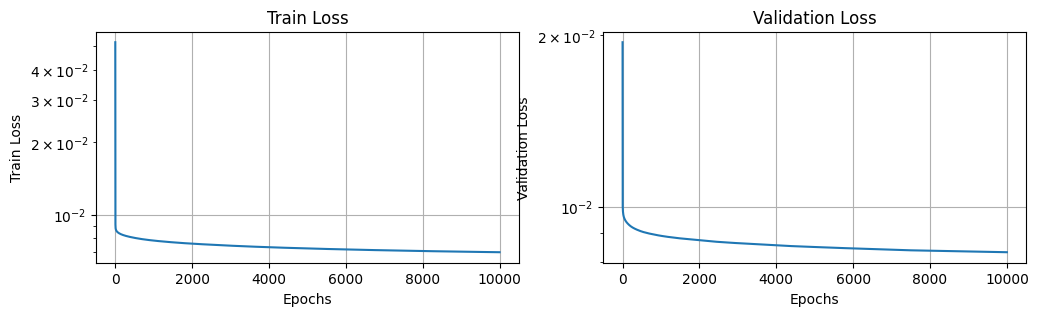

In [3]:
from robot_kinematics_regression import * 
from hands_on_regression import *

# Prepare the data:
train_data_path = "robot_kinematics_training_data.npz"
val_data_path = "robot_kinematics_validation_data.npz"

train_data = np.load(train_data_path)
val_data = np.load(val_data_path)

# Unpack the data
# we will use x for input and y for target to keep consistent with previous question
x = torch.from_numpy(train_data['theta'])
y = torch.from_numpy(train_data['x'])

x_val = torch.from_numpy(val_data['theta'])
y_val = torch.from_numpy(val_data['x'])

# Compute normalization constants
x_mean, x_std = get_normalization_constants(x)
y_mean, y_std = get_normalization_constants(y)

# Normalize the datasets
x_norm = normalize_tensor(x, x_mean, x_std)
y_norm = normalize_tensor(y, y_mean, y_std)
x_val_norm = normalize_tensor(x_val, x_mean, x_std)
y_val_norm = normalize_tensor(y_val, y_mean, y_std)

## --- Your code here
mlp = MLP()

train_dataset = SimpleDataset(x_norm, y_norm)
val_dataset = SimpleDataset(x_val_norm, y_val_norm)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))

# save normalization constants:
norm_constants = {
   'X_mean': x_mean,
   'X_std': x_std,
   'y_mean': y_mean,
   'y_std': y_std, 
}
save_path = "robot_kinematics_norm_constants.pt"

torch.save(norm_constants, save_path)
num_epoches = 1000
# lr = 0.36
# train_losses, val_losses = train_model(mlp, train_loader, val_loader, num_epochs=num_epoches, lr=lr)
lrr = np.arange(0.20, 0.75, 0.0025)  # Step size is 0.01
losss = []
best_loss = 0.015
best_lr = 0.20
for lr in lrr:
# Train the model
   train_losses, val_losses = train_model_1(mlp, train_loader, val_loader, num_epochs=num_epoches, lr=lr)
   print(lr,train_losses[-1],val_losses[-1])
   losss.append(train_losses[-1])
   # store best lr and loss
   if train_losses[-1] < best_loss:
      best_loss = train_losses[-1]
      best_lr = lr
print(best_lr, best_loss)
train_losses, val_losses = train_model(mlp, train_loader, val_loader, num_epochs=10000, lr=float(best_lr))
# Save the trained model
torch.save(mlp.state_dict(), "robot_kinematics_model.pt")
# plot train loss and test loss:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes[0].plot(train_losses)
axes[0].grid()
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Train Loss')
axes[0].set_yscale('log')
axes[1].plot(val_losses)
axes[1].grid()
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss')
axes[1].set_yscale('log')
# ---


0.2 0.006939351093024015


Train Loss: 0.0067 | Validation Loss: 0.0082: 100%|██████████| 1000/1000 [01:14<00:00, 13.48it/s]


0.435 0.006722014397382736 0.008155541494488716


Train Loss: 0.0067 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:14<00:00, 13.47it/s]


0.4375 0.006678049452602863 0.008137520402669907


Train Loss: 0.0066 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:14<00:00, 13.46it/s]


0.44 0.006638793740421534 0.00812574289739132


Train Loss: 0.0066 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:14<00:00, 13.48it/s]


0.4425 0.0066028679721057415 0.008119477890431881


Train Loss: 0.0066 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:13<00:00, 13.66it/s]


0.445 0.00657131802290678 0.008106415160000324


Train Loss: 0.0065 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:12<00:00, 13.88it/s]


0.4475 0.006541511509567499 0.008091442286968231


Train Loss: 0.0065 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:12<00:00, 13.76it/s]


0.45 0.006514952052384615 0.008080932311713696


Train Loss: 0.0065 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:12<00:00, 13.73it/s]


0.4525 0.006489526946097612 0.008065513335168362


Train Loss: 0.0065 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:13<00:00, 13.60it/s]


0.455 0.006465203128755093 0.008050784468650818


Train Loss: 0.0064 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:10<00:00, 14.25it/s]


0.4575 0.006442796438932419 0.008041131310164928


Train Loss: 0.0064 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:10<00:00, 14.21it/s]


0.46 0.006420903839170933 0.008035773411393166


Train Loss: 0.0064 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:10<00:00, 14.22it/s]


0.4625 0.006400184705853462 0.008034189231693745


Train Loss: 0.0064 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:11<00:00, 13.99it/s]


0.465 0.006381048355251551 0.008027888834476471


Train Loss: 0.0064 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:14<00:00, 13.42it/s]


0.4675 0.006362582556903362 0.008021246641874313


Train Loss: 0.0063 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:14<00:00, 13.33it/s]


0.47000000000000003 0.006346186622977257 0.008019675500690937


Train Loss: 0.0063 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:14<00:00, 13.35it/s]


0.47250000000000003 0.006330395583063364 0.008011916652321815


Train Loss: 0.0063 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:15<00:00, 13.24it/s]


0.47500000000000003 0.006315575912594795 0.00800482276827097


Train Loss: 0.0063 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:16<00:00, 13.11it/s]


0.47750000000000004 0.006301855202764273 0.00800240132957697


Train Loss: 0.0063 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:16<00:00, 13.01it/s]


0.48000000000000004 0.00628895265981555 0.008001060225069523


Train Loss: 0.0063 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:17<00:00, 12.92it/s]


0.48250000000000004 0.006276153493672609 0.00799956638365984


Train Loss: 0.0063 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:18<00:00, 12.78it/s]


0.48500000000000004 0.006264206487685442 0.007997606880962849


Train Loss: 0.0063 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:17<00:00, 12.83it/s]


0.48750000000000004 0.006252386141568422 0.007994239218533039


Train Loss: 0.0062 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:17<00:00, 12.87it/s]


0.49000000000000005 0.0062409210950136185 0.007990571670234203


Train Loss: 0.0062 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:17<00:00, 12.87it/s]


0.49250000000000005 0.006229978054761887 0.007990405894815922


Train Loss: 0.0062 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:13<00:00, 13.56it/s]


0.49500000000000005 0.006218891125172377 0.007986679673194885


Train Loss: 0.0062 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:11<00:00, 14.08it/s]


0.49750000000000005 0.00620810454711318 0.007983910851180553


Train Loss: 0.0062 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:10<00:00, 14.24it/s]


0.5 0.006202521733939648 0.00798617210239172


Train Loss: 0.0062 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:10<00:00, 14.18it/s]


0.5025000000000001 0.006193985231220722 0.007986367680132389


Train Loss: 0.0062 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:10<00:00, 14.17it/s]


0.5050000000000001 0.006206990219652653 0.008012974634766579


Train Loss: 0.0062 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:16<00:00, 13.13it/s]


0.5075000000000001 0.006223417818546295 0.008036789484322071


Train Loss: 0.0062 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:17<00:00, 12.96it/s]


0.51 0.0062134405598044395 0.008031419478356838


Train Loss: 0.0062 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:17<00:00, 12.98it/s]


0.5125000000000001 0.006233739200979471 0.008062290959060192


Train Loss: 0.0062 | Validation Loss: 0.0080: 100%|██████████| 1000/1000 [01:16<00:00, 12.99it/s]


0.5150000000000001 0.006202043034136295 0.008032018318772316


Train Loss: 0.0063 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:16<00:00, 13.06it/s]


0.5175000000000001 0.006259169429540634 0.00810548011213541


Train Loss: 0.0063 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:16<00:00, 13.04it/s]


0.52 0.006258249748498201 0.00811719335615635


Train Loss: 0.0063 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:17<00:00, 12.94it/s]


0.5225000000000001 0.0062746452167630196 0.008145944215357304


Train Loss: 0.0062 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:17<00:00, 12.95it/s]


0.5250000000000001 0.006245119031518698 0.00811933446675539


Train Loss: 0.0062 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:17<00:00, 12.97it/s]


0.5275000000000001 0.0062393867410719395 0.008123831823468208


Train Loss: 0.0063 | Validation Loss: 0.0082: 100%|██████████| 1000/1000 [01:17<00:00, 12.91it/s]


0.53 0.006260054185986519 0.008161697536706924


Train Loss: 0.0062 | Validation Loss: 0.0081: 100%|██████████| 1000/1000 [01:16<00:00, 13.02it/s]


0.5325000000000001 0.006180017255246639 0.00807521864771843


Train Loss: 0.0063 | Validation Loss: 0.0082: 100%|██████████| 1000/1000 [01:16<00:00, 13.11it/s]


0.5350000000000001 0.0063075292855501175 0.008234360255300999
0.5325000000000001 0.006180017255246639


Train Loss: 0.0062 | Validation Loss: 0.0081: 100%|██████████| 6000/6000 [07:41<00:00, 13.00it/s]


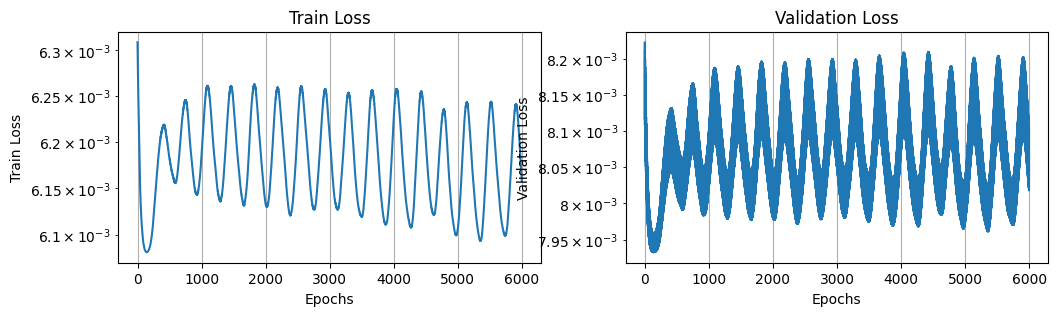

In [9]:
print(best_lr, best_loss)
bb = 0.435
lrr = np.arange(bb, bb+0.1, 0.0025)  # Step size is 0.01
for lr in lrr:
# Train the model
   train_losses, val_losses = train_model_1(mlp, train_loader, val_loader, num_epochs=num_epoches, lr=lr)
   print(lr,train_losses[-1],val_losses[-1])
   losss.append(train_losses[-1])
   # store best lr and loss
   if train_losses[-1] < best_loss:
      best_loss = train_losses[-1]
      best_lr = lr
print(best_lr, best_loss)
train_losses, val_losses = train_model(mlp, train_loader, val_loader, num_epochs=6000, lr=float(best_lr))
# Save the trained model
torch.save(mlp.state_dict(), "robot_kinematics_model.pt")
# plot train loss and test loss:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes[0].plot(train_losses)
axes[0].grid()
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Train Loss')
axes[0].set_yscale('log')
axes[1].plot(val_losses)
axes[1].grid()
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss')
axes[1].set_yscale('log')
# ---

[I 2025-01-29 13:50:53,525] A new study created in memory with name: no-name-43cdf421-9aac-4835-b1e9-bbcf48263f13


/var/folders/3m/fp8bm06s7g70bqzt6nvh_64w0000gn/T/ipykernel_4276/2640804339.py:46: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 0.001, 0.5)
[I 2025-01-29 13:50:57,782] Trial 0 finished with value: 0.5602309703826904 and parameters: {'lr': 0.07751383237875593, 'num_epochs': 811}. Best is trial 0 with value: 0.5602309703826904.
/var/folders/3m/fp8bm06s7g70bqzt6nvh_64w0000gn/T/ipykernel_4276/2640804339.py:46: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 0.001, 0.5)
[I 2025-01-29 13:51:01,373] Trial 1 finished with value: 0.8781391382217407 and parameters: {'lr': 0.009327852150933473, 'num_epochs': 288

Best Learning Rate: 0.19587391285160433, Best Epochs: 1398


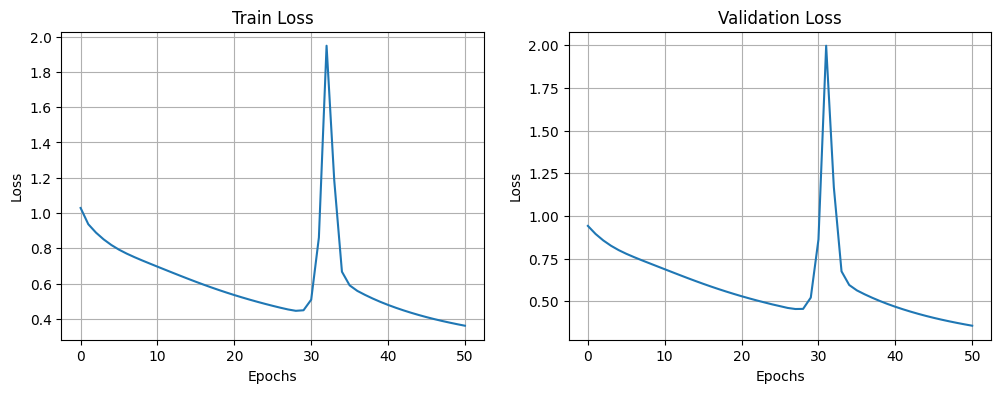

In [3]:
import torch
import numpy as np
import optuna
from torch.utils.data import DataLoader
from robot_kinematics_regression import *
from hands_on_regression import *

# Prepare the data:
train_data_path = "robot_kinematics_training_data.npz"
val_data_path = "robot_kinematics_validation_data.npz"

train_data = np.load(train_data_path)
val_data = np.load(val_data_path)

# Unpack the data
x = torch.from_numpy(train_data['theta']).float()
y = torch.from_numpy(train_data['x']).float()
x_val = torch.from_numpy(val_data['theta']).float()
y_val = torch.from_numpy(val_data['x']).float()

# Compute normalization constants
x_mean, x_std = get_normalization_constants(x)
y_mean, y_std = get_normalization_constants(y)

# Normalize the datasets
x_norm = normalize_tensor(x, x_mean, x_std)
y_norm = normalize_tensor(y, y_mean, y_std)
x_val_norm = normalize_tensor(x_val, x_mean, x_std)
y_val_norm = normalize_tensor(y_val, y_mean, y_std)

# Create datasets
train_dataset = SimpleDataset(x_norm, y_norm)
val_dataset = SimpleDataset(x_val_norm, y_val_norm)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))

# Save normalization constants:
torch.save({'X_mean': x_mean, 'X_std': x_std, 'y_mean': y_mean, 'y_std': y_std}, "robot_kinematics_norm_constants.pt")


def objective(trial):
    """Objective function for Optuna hyperparameter tuning."""
    # Suggest learning rate and number of epochs
    lr = trial.suggest_loguniform('lr', 0.001, 0.5)
    num_epochs = trial.suggest_int('num_epochs', 100, 5000)

    # Initialize model
    model = MLP()
    optimizer = torch.optim.SGD(model.parameters(), lr)
    
    # Train model
    train_losses, val_losses = train_model(model, train_loader, val_loader, num_epochs=num_epochs, optimizer=optimizer)

    # Return final validation loss as the objective to minimize
    return val_losses[-1]


def train_model(model, train_dataloader, val_dataloader, num_epochs, optimizer):
    """Trains the model and returns loss values."""
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        train_loss = train_step(model, train_dataloader, optimizer)
        val_loss = val_step(model, val_dataloader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Early stopping conditions
        if epoch == 50 and train_loss > 0.025:
            break
        if epoch == 200 and train_loss > 0.015:
            break
        if epoch == 750 and train_loss > 0.01:
            break

    return train_losses, val_losses


# Run Optuna for hyperparameter tuning
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)  # Run 20 trials for best LR and Epochs

# Best parameters from tuning
best_lr = study.best_params['lr']
best_num_epochs = study.best_params['num_epochs']
print(f"Best Learning Rate: {best_lr}, Best Epochs: {best_num_epochs}")

# Train final model with best hyperparameters
final_model = MLP()
final_optimizer = torch.optim.SGD(final_model.parameters(), best_lr)
train_losses, val_losses = train_model(final_model, train_loader, val_loader, num_epochs=best_num_epochs, optimizer=final_optimizer)

# Save the trained model
torch.save(final_model.state_dict(), "robot_kinematics_model.pt")

# Plot train and validation losses
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(train_losses)
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

axes[1].plot(val_losses)
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].grid(True)

plt.show()

[I 2025-01-29 15:01:09,113] A new study created in memory with name: no-name-6f39a574-7003-4071-82b6-c7ab456bb475


/var/folders/3m/fp8bm06s7g70bqzt6nvh_64w0000gn/T/ipykernel_4276/345478566.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 0.00005, 0.01)  # Fine-grained search
[I 2025-01-29 15:02:37,664] Trial 0 finished with value: 0.008357329279302604 and parameters: {'lr': 0.0001126410935370065, 'num_epochs': 590}. Best is trial 0 with value: 0.008357329279302604.


Early stopping at epoch 527


[I 2025-01-29 15:03:09,994] Trial 1 finished with value: 0.00884571522178631 and parameters: {'lr': 0.004542295153746845, 'num_epochs': 1620}. Best is trial 0 with value: 0.008357329279302604.


Early stopping at epoch 196


[I 2025-01-29 15:04:12,161] Trial 2 finished with value: 0.007887701873504927 and parameters: {'lr': 0.0069243783559992285, 'num_epochs': 4109}. Best is trial 2 with value: 0.007887701873504927.


Early stopping at epoch 375


[I 2025-01-29 15:05:21,581] Trial 3 finished with value: 0.007958464937964602 and parameters: {'lr': 0.008311651003891718, 'num_epochs': 2365}. Best is trial 2 with value: 0.007887701873504927.


Early stopping at epoch 391


[I 2025-01-29 15:06:28,761] Trial 4 finished with value: 0.007825973717170575 and parameters: {'lr': 0.0005770846139615631, 'num_epochs': 1707}. Best is trial 4 with value: 0.007825973717170575.


Early stopping at epoch 398


[I 2025-01-29 15:07:17,806] Trial 5 finished with value: 0.007637733541842964 and parameters: {'lr': 0.0018016757051712384, 'num_epochs': 1891}. Best is trial 5 with value: 0.007637733541842964.


Early stopping at epoch 296


[I 2025-01-29 15:08:42,413] Trial 6 finished with value: 0.009117233966078078 and parameters: {'lr': 7.477237882862866e-05, 'num_epochs': 3767}. Best is trial 5 with value: 0.007637733541842964.


Early stopping at epoch 516


[I 2025-01-29 15:09:16,448] Trial 7 finished with value: 0.007977198351115461 and parameters: {'lr': 0.005402626671632408, 'num_epochs': 3756}. Best is trial 5 with value: 0.007637733541842964.


Early stopping at epoch 202


[I 2025-01-29 15:10:43,973] Trial 8 finished with value: 0.008746309930251705 and parameters: {'lr': 0.00010892368482923928, 'num_epochs': 2906}. Best is trial 5 with value: 0.007637733541842964.


Early stopping at epoch 526


[I 2025-01-29 15:13:50,820] Trial 9 finished with value: 0.010220791294520337 and parameters: {'lr': 5.2757238786066105e-05, 'num_epochs': 4477}. Best is trial 5 with value: 0.007637733541842964.


Early stopping at epoch 1134


[I 2025-01-29 15:14:30,414] Trial 10 finished with value: 0.007947227296729883 and parameters: {'lr': 0.0012966632659325548, 'num_epochs': 656}. Best is trial 5 with value: 0.007637733541842964.


Early stopping at epoch 238


[I 2025-01-29 15:15:12,811] Trial 11 finished with value: 0.007935794949945476 and parameters: {'lr': 0.0006462669939295554, 'num_epochs': 1817}. Best is trial 5 with value: 0.007637733541842964.


Early stopping at epoch 256


[I 2025-01-29 15:15:59,025] Trial 12 finished with value: 0.007818887143262796 and parameters: {'lr': 0.0006172918233564562, 'num_epochs': 1517}. Best is trial 5 with value: 0.007637733541842964.


Early stopping at epoch 283


[I 2025-01-29 15:16:25,955] Trial 13 finished with value: 0.007837432761868787 and parameters: {'lr': 0.0014749359409398455, 'num_epochs': 2791}. Best is trial 5 with value: 0.007637733541842964.


Early stopping at epoch 163


[I 2025-01-29 15:16:54,938] Trial 14 finished with value: 0.008260089955810044 and parameters: {'lr': 0.00028011091920932777, 'num_epochs': 1141}. Best is trial 5 with value: 0.007637733541842964.


Early stopping at epoch 176


[I 2025-01-29 15:17:57,488] Trial 15 finished with value: 0.0075817338841420315 and parameters: {'lr': 0.002086694983187926, 'num_epochs': 2094}. Best is trial 15 with value: 0.0075817338841420315.


Early stopping at epoch 380


[I 2025-01-29 15:18:49,400] Trial 16 finished with value: 0.00785680982979044 and parameters: {'lr': 0.002960188118331006, 'num_epochs': 2338}. Best is trial 15 with value: 0.0075817338841420315.


Early stopping at epoch 317


[I 2025-01-29 15:19:34,969] Trial 17 finished with value: 0.007745169746201663 and parameters: {'lr': 0.0020870536879070644, 'num_epochs': 3339}. Best is trial 15 with value: 0.0075817338841420315.


Early stopping at epoch 278


[I 2025-01-29 15:20:47,372] Trial 18 finished with value: 0.007883211797369378 and parameters: {'lr': 0.00028838668431980125, 'num_epochs': 2255}. Best is trial 15 with value: 0.0075817338841420315.


Early stopping at epoch 441


[I 2025-01-29 15:22:05,494] Trial 19 finished with value: 0.007639639168268158 and parameters: {'lr': 0.0029814484397558383, 'num_epochs': 1025}. Best is trial 15 with value: 0.0075817338841420315.


Early stopping at epoch 472
Optimal Learning Rate: 0.002086694983187926, Optimal Epochs: 2094
Early stopping at epoch 358


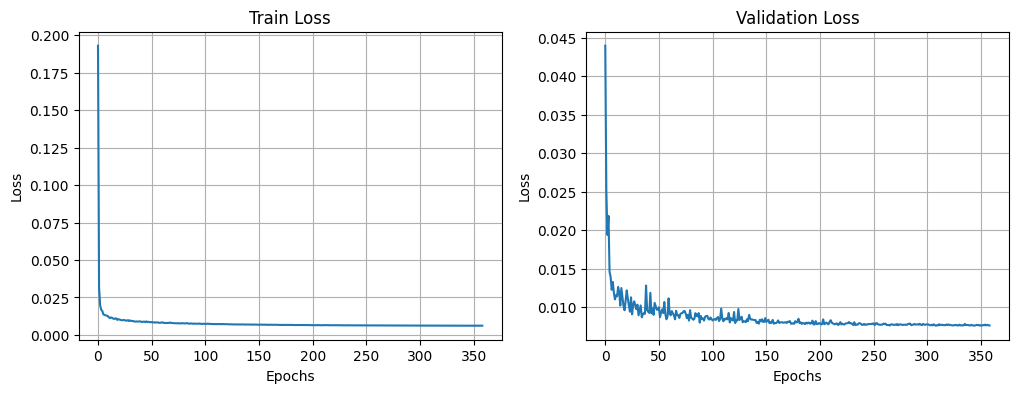

In [9]:
import optuna
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import Adam
from torch.utils.data import DataLoader
from robot_kinematics_regression import *
from hands_on_regression import *

# Load Data
train_data_path = "robot_kinematics_training_data.npz"
val_data_path = "robot_kinematics_validation_data.npz"

train_data = np.load(train_data_path)
val_data = np.load(val_data_path)

x = torch.from_numpy(train_data['theta']).float()
y = torch.from_numpy(train_data['x']).float()
x_val = torch.from_numpy(val_data['theta']).float()
y_val = torch.from_numpy(val_data['x']).float()

# Normalize Data
x_mean, x_std = get_normalization_constants(x)
y_mean, y_std = get_normalization_constants(y)
x_norm = normalize_tensor(x, x_mean, x_std)
y_norm = normalize_tensor(y, y_mean, y_std)
x_val_norm = normalize_tensor(x_val, x_mean, x_std)
y_val_norm = normalize_tensor(y_val, y_mean, y_std)

# Create Datasets
train_dataset = SimpleDataset(x_norm, y_norm)
val_dataset = SimpleDataset(x_val_norm, y_val_norm)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Save Normalization Constants
torch.save({'X_mean': x_mean, 'X_std': x_std, 'y_mean': y_mean, 'y_std': y_std}, "robot_kinematics_norm_constants.pt")


def objective(trial):
    """Hyperparameter tuning with Optuna."""
    lr = trial.suggest_loguniform('lr', 0.00005, 0.01)  # Fine-grained search
    num_epochs = trial.suggest_int('num_epochs', 500, 5000)

    model = MLP()
    optimizer = Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)  # Better LR decay

    train_losses, val_losses = train_model(model, train_loader, val_loader, num_epochs, optimizer, scheduler)

    return val_losses[-1]  # Minimize final validation loss

def val_step(model, dataloader):
    loss_fn = torch.nn.MSELoss()  # Ensure correct function use
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)  # Make sure loss is calculated properly
            total_loss += loss.item()
    return total_loss / len(dataloader)

def train_model(model, train_dataloader, val_dataloader, num_epochs, optimizer, scheduler):
    """Train model with early stopping, learning rate decay, and gradient clipping."""
    train_losses, val_losses = [], []
    best_loss = float('inf')
    patience, patience_counter = 50, 0  # Lower patience for early stopping

    for epoch in range(num_epochs):
        train_loss = train_step(model, train_dataloader, optimizer)

        # Gradient clipping to prevent instability
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        val_loss = val_step(model, val_dataloader)
        scheduler.step()  # Decay LR every epoch

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Early stopping if validation loss stagnates
        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        if train_loss < 0.004:  # Stop training if the loss is sufficiently low
            print(f"Target train loss reached at epoch {epoch}")
            break

    return train_losses, val_losses


# Run hyperparameter tuning
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Best Hyperparameters
best_lr = study.best_params['lr']
best_epochs = study.best_params['num_epochs']
print(f"Optimal Learning Rate: {best_lr}, Optimal Epochs: {best_epochs}")

# Train Final Model with Optimized Parameters
final_model = MLP()
final_optimizer = Adam(final_model.parameters(), best_lr)
final_scheduler = torch.optim.lr_scheduler.ExponentialLR(final_optimizer, gamma=0.99)

train_losses, val_losses = train_model(final_model, train_loader, val_loader, best_epochs, final_optimizer, final_scheduler)

# Save Final Model
torch.save(final_model.state_dict(), "robot_kinematics_model.pt")

# Plot Loss Curves
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(train_losses)
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

axes[1].plot(val_losses)
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].grid(True)

plt.show()

Train Loss: 0.4864 | Validation Loss: 0.4939: 100%|██████████| 2094/2094 [02:53<00:00, 12.06it/s]


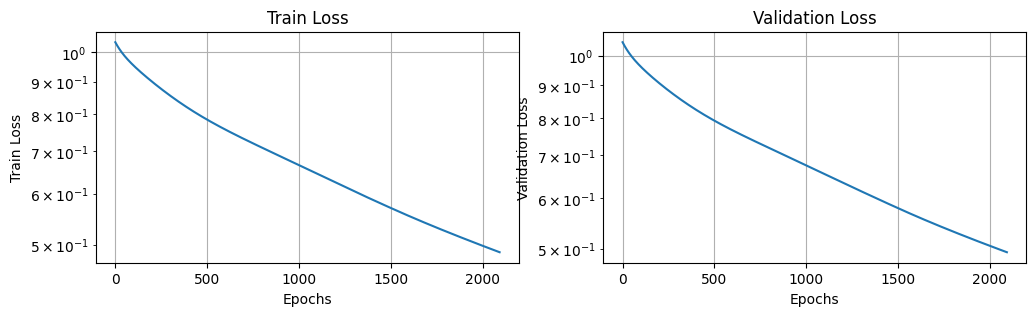

In [10]:
from robot_kinematics_regression import * 
from hands_on_regression import *

# Prepare the data:
train_data_path = "robot_kinematics_training_data.npz"
val_data_path = "robot_kinematics_validation_data.npz"

train_data = np.load(train_data_path)
val_data = np.load(val_data_path)

# Unpack the data
# we will use x for input and y for target to keep consistent with previous question
x = torch.from_numpy(train_data['theta'])
y = torch.from_numpy(train_data['x'])

x_val = torch.from_numpy(val_data['theta'])
y_val = torch.from_numpy(val_data['x'])

# Compute normalization constants
x_mean, x_std = get_normalization_constants(x)
y_mean, y_std = get_normalization_constants(y)

# Normalize the datasets
x_norm = normalize_tensor(x, x_mean, x_std)
y_norm = normalize_tensor(y, y_mean, y_std)
x_val_norm = normalize_tensor(x_val, x_mean, x_std)
y_val_norm = normalize_tensor(y_val, y_mean, y_std)

## --- Your code here
mlp = MLP()

train_dataset = SimpleDataset(x_norm, y_norm)
val_dataset = SimpleDataset(x_val_norm, y_val_norm)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))

# save normalization constants:
norm_constants = {
   'X_mean': x_mean,
   'X_std': x_std,
   'y_mean': y_mean,
   'y_std': y_std, 
}
save_path = "robot_kinematics_norm_constants.pt"

torch.save(norm_constants, save_path)
num_epoches = 2094
lr = 0.002086694983187926
train_losses, val_losses = train_model(mlp, train_loader, val_loader, num_epochs=num_epoches, lr=lr)
# lrr = np.arange(0.20, 0.75, 0.0025)  # Step size is 0.01
# losss = []
# best_loss = 0.015
# best_lr = 0.20
# for lr in lrr:
# # Train the model
#    train_losses, val_losses = train_model_1(mlp, train_loader, val_loader, num_epochs=num_epoches, lr=lr)
#    print(lr,train_losses[-1],val_losses[-1])
#    losss.append(train_losses[-1])
#    # store best lr and loss
#    if train_losses[-1] < best_loss:
#       best_loss = train_losses[-1]
#       best_lr = lr
# print(best_lr, best_loss)
# train_losses, val_losses = train_model(mlp, train_loader, val_loader, num_epochs=10000, lr=float(best_lr))
# Save the trained model
# torch.save(mlp.state_dict(), "robot_kinematics_model.pt")
# plot train loss and test loss:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes[0].plot(train_losses)
axes[0].grid()
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Train Loss')
axes[0].set_yscale('log')
axes[1].plot(val_losses)
axes[1].grid()
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss')
axes[1].set_yscale('log')
# ---


**GRADING GUIDE**

Your `MLP` implementation will be graded by evaluating its predictive accuracy on the validation data provided (13 points) as well as a hidden test data set (13 points).
Your model will have to have a predicive score of less than 0.01.

The remaining 4 points are for the right network architecture.

In [7]:
y_pred = mlp(x_norm)
train_score = F.mse_loss(y_pred, y_norm).item()
y_pred_val = mlp(x_val_norm)
val_score = F.mse_loss(y_pred_val, y_val_norm).item()
print(f'Train set score: {train_score}')
print(f'Validation set score: {val_score}')

NameError: name 'mlp' is not defined